# INIT

In [ ]:
install.packages(c("forecast", "aTSA", "datasets", "Metrics", "ISLR"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”
also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [ ]:
devtools::install_github ("bdemeshev/sophisthse")

BH      (NA    -> 1.81.0-1 ) [CRAN]
anytime (NA    -> 0.3.9    ) [CRAN]
bitops  (NA    -> 1.0-7    ) [CRAN]
stringr (1.4.1 -> 1.5.0    ) [CRAN]
tsibble (NA    -> 1.1.3    ) [CRAN]
RCurl   (NA    -> 1.98-1.12) [CRAN]
XML     (NA    -> 3.99-0.14) [CRAN]


Installing 7 packages: BH, anytime, bitops, stringr, tsibble, RCurl, XML

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpsAmdKA/remotes1fc4af947a9/bdemeshev-sophisthse-4c75680/DESCRIPTION’ ... OK
* preparing ‘sophisthse’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘sophisthse_0.8.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("forecast")
library('ISLR')
library("aTSA")
library("datasets")
library("Metrics")
library("sophisthse")
library(tseries)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘aTSA’


The following object is masked from ‘package:forecast’:

    forecast


The following object is masked from ‘package:graphics’:

    identify



Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy



Attaching package: ‘tseries’


The following objects are masked from ‘package:aTSA’:

    adf.test, kpss.test, pp.test




Необходимо для вызова shell command, например чтобы скачать датасет

In [ ]:
sh <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}

In [ ]:
sh("ls & echo 'hello world'")

hello world
sample_data

Построение различных ARIMA(p, d, q) моделей

In [ ]:
# Создаст все возможные наборы ARIMA с различными значениями авторегрессий, дифференциированний и скользящего среднего
# Вернет датафрейм с оценками
createArimas <- function(learn, test, max_p, max_d, max_q){
  counter = 0
  qq <- c()
  pp <- c()
  dd <- c()
  RMSE <- c()
  MAE <- c()
  AIC_c <- c()
  for(d in 0:max_d){
    for (p in 0:max_p)
    {
      for (q in 0:max_q)
      {
        res <- tryCatch(
          {
            model = Arima(learn, order = c(p,d,q))
            pred = predict(model, n.ahead = 12)
            AIC_c = append(AIC_c, AIC(model))
            RMSE = append(RMSE, rmse(test, pred$pred))
            MAE = append(MAE, mae(test, pred$pred))
            pp = append(pp, p)
            qq = append(qq, q)
            dd = append(dd, d)
            counter = counter + 1
          },
          error = function(cond)
          {return(NA)})
      }
    }
  }
  DF_RMSE_MAE = data.frame(p = pp, d=dd, q = qq, RMSE, MAE, AIC=AIC_c)
  return(DF_RMSE_MAE)
}

# Индекс реальных денежных доходов населения

## Временной ряд

In [ ]:
im <- sophisthse("HHI_M_DIRI")[, "HHI_M_DIRI_SA"]

In [ ]:
im

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1992,,,,,,,,,,,,85.4
1993,85.9,86.5,87.1,87.9,88.6,89.2,89.7,90.1,90.5,90.8,91.6,93.1
1994,95.1,97.1,98.8,100.5,102.3,104.4,106.3,107.7,108.1,107.0,104.3,100.5
1995,96.6,93.6,91.6,90.6,90.1,89.8,89.3,88.6,87.9,87.6,88.0,88.9
1996,89.8,90.2,90.2,89.4,88.3,87.5,87.5,88.2,89.7,91.4,93.2,94.6
1997,95.7,96.3,96.7,96.7,96.4,95.6,94.6,93.7,93.2,93.0,92.9,92.6
1998,91.8,90.4,88.7,87.0,85.5,84.1,82.5,80.6,78.2,75.6,73.0,70.7
1999,69.0,68.1,67.8,67.8,68.1,68.4,68.9,69.5,70.4,71.6,73.1,74.6
2000,75.9,77.0,77.9,78.4,78.7,79.0,79.2,79.6,79.9,80.3,80.6,81.0
2001,81.4,81.8,82.5,83.6,84.8,86.2,87.4,88.1,88.5,88.6,88.6,88.7


Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


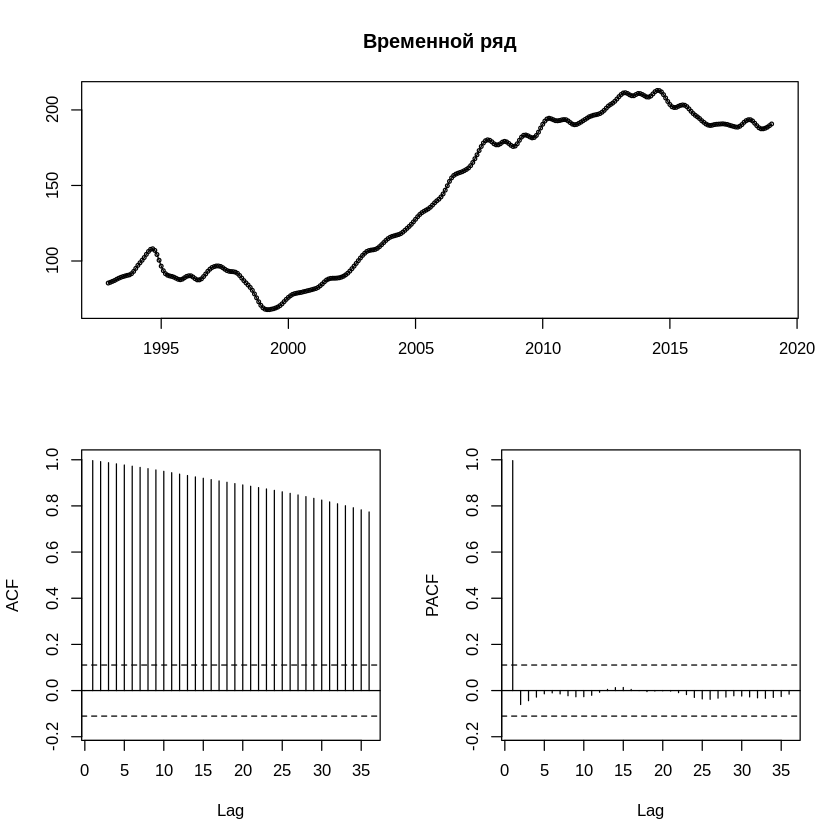

In [ ]:
tsdisplay(im, main = 'Временной ряд', ci.col = "black")

In [ ]:
adf.test(im)


	Augmented Dickey-Fuller Test

data:  im
Dickey-Fuller = -1.5628, Lag order = 6, p-value = 0.7608
alternative hypothesis: stationary


p > 0.05

Автокорелляция снижается слишком медленно, нет нулевых коэффициентов. Ряд не станционарный, также наблюдается некоторая сезонность в частных автокорреляциях.

In [ ]:
im_2diff <- diff(diff(im))

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


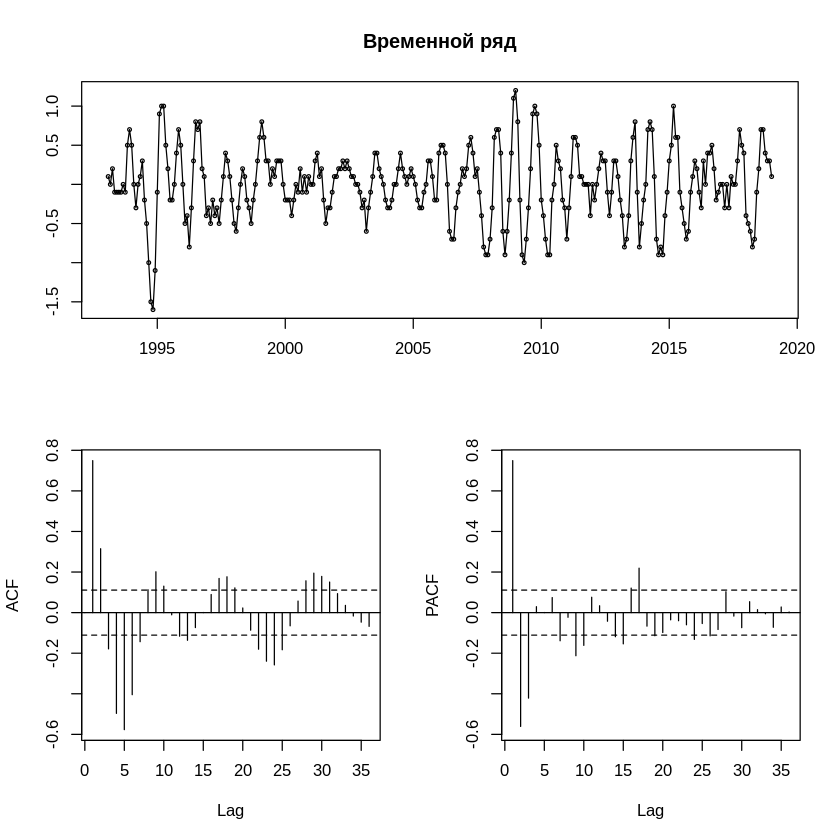

In [ ]:
tsdisplay(diff(diff(im)), main = 'Временной ряд', ci.col = "black")

In [ ]:
adf.test(im_2diff)

Warning message in adf.test(im_2diff):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  im_2diff
Dickey-Fuller = -7.9372, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


p < 0.05

При двух разницах между лагами действительно отчетливо наблюдается сезонность. Попробуем считать временной ряд с 2000 года.

In [ ]:
im2k <- window(im, start = 2000)

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


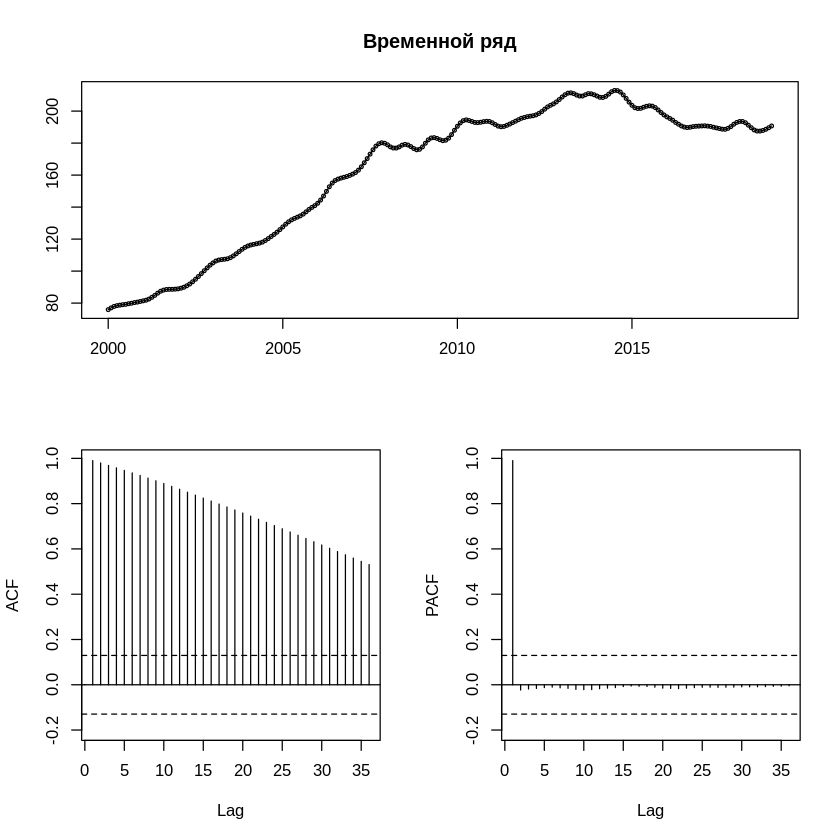

In [ ]:
tsdisplay(im2k, main = 'Временной ряд', ci.col = "black")

In [ ]:
adf.test(im2k)


	Augmented Dickey-Fuller Test

data:  im2k
Dickey-Fuller = -0.38745, Lag order = 6, p-value = 0.9863
alternative hypothesis: stationary


In [ ]:
im2k_2diff <- diff(diff(im2k))

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


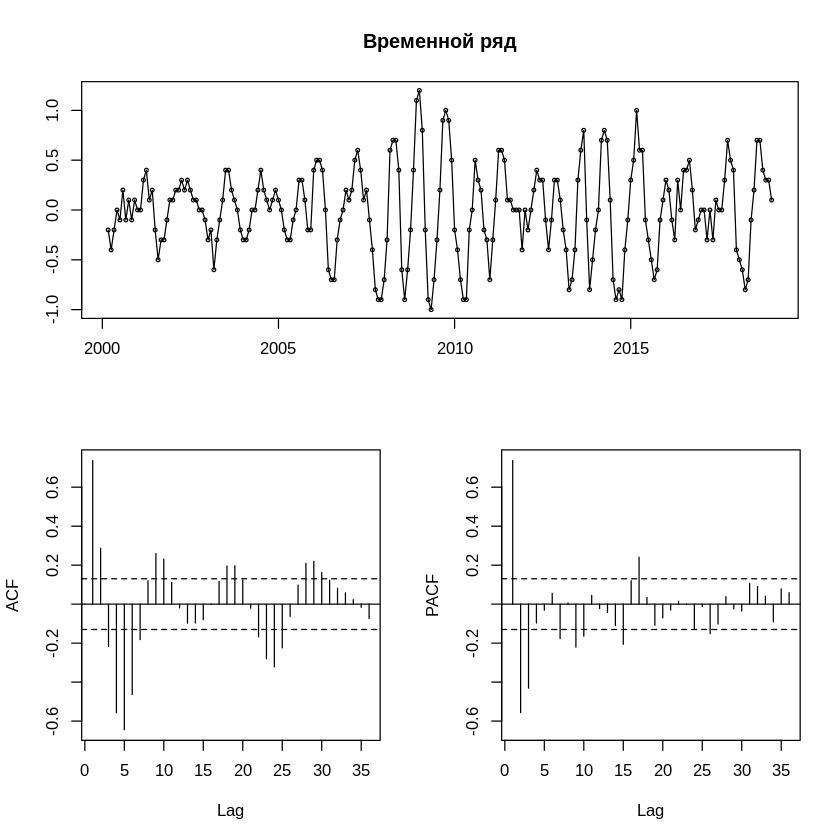

In [ ]:
tsdisplay(im2k_2diff, main = 'Временной ряд', ci.col = "black")

In [ ]:
adf.test(im2k_2diff)

Warning message in adf.test(im2k_2diff):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  im2k_2diff
Dickey-Fuller = -7.7525, Lag order = 6, p-value = 0.01
alternative hypothesis: stationary


ACF и PACF практически индетичные с полным временным рядом.

In [ ]:
im2k_test = tail(im2k_2diff, 12)
im2k_learn = head(im2k_2diff, -12)

In [ ]:
im2k_learn

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2000,,,-2.000000e-01,-4.000000e-01,-2.000000e-01,0.000000e+00,-1.000000e-01,2.000000e-01,-1.000000e-01,1.000000e-01,-1.000000e-01,1.000000e-01
2001,0.000000e+00,-1.421085e-14,3.000000e-01,4.000000e-01,1.000000e-01,2.000000e-01,-2.000000e-01,-5.000000e-01,-3.000000e-01,-3.000000e-01,-1.000000e-01,1.000000e-01
2002,1.000000e-01,2.000000e-01,2.000000e-01,3.000000e-01,2.000000e-01,3.000000e-01,2.000000e-01,1.000000e-01,1.000000e-01,-1.421085e-14,0.000000e+00,-1.000000e-01
2003,-3.000000e-01,-2.000000e-01,-6.000000e-01,-3.000000e-01,-1.000000e-01,1.000000e-01,4.000000e-01,4.000000e-01,2.000000e-01,1.000000e-01,-1.421085e-14,-2.000000e-01
2004,-3.000000e-01,-3.000000e-01,-2.000000e-01,-1.421085e-14,1.421085e-14,2.000000e-01,4.000000e-01,2.000000e-01,1.000000e-01,1.421085e-14,1.000000e-01,2.000000e-01
2005,1.000000e-01,2.842171e-14,-2.000000e-01,-3.000000e-01,-3.000000e-01,-1.000000e-01,2.842171e-14,3.000000e-01,3.000000e-01,1.000000e-01,-2.000000e-01,-2.000000e-01
2006,4.000000e-01,5.000000e-01,5.000000e-01,4.000000e-01,-2.842171e-14,-6.000000e-01,-7.000000e-01,-7.000000e-01,-3.000000e-01,-1.000000e-01,0.000000e+00,2.000000e-01
2007,1.000000e-01,2.000000e-01,5.000000e-01,6.000000e-01,4.000000e-01,1.000000e-01,2.000000e-01,-1.000000e-01,-4.000000e-01,-8.000000e-01,-9.000000e-01,-9.000000e-01
2008,-7.000000e-01,-3.000000e-01,6.000000e-01,7.000000e-01,7.000000e-01,4.000000e-01,-6.000000e-01,-9.000000e-01,-6.000000e-01,-2.000000e-01,4.000000e-01,1.100000e+00
2009,1.200000e+00,8.000000e-01,-2.000000e-01,-9.000000e-01,-1.000000e+00,-7.000000e-01,-3.000000e-01,2.000000e-01,9.000000e-01,1.000000e+00,9.000000e-01,5.000000e-01


In [ ]:
im2k_test

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2018,,-0.5,-0.6,-0.8,-0.7,-0.1,0.2,0.7,0.7,0.4,0.3,0.3
2019,0.1,,,,,,,,,,,


## Поиск лучшей модели ARIMA.auto

In [ ]:
auto2k = auto.arima(im2k_learn, trace= TRUE, ic ="aicc", approximation = FALSE, stepwise = FALSE, seasonal=TRUE)
summary(auto2k)


 ARIMA(0,0,0)            with zero mean     : 253.997
 ARIMA(0,0,0)            with non-zero mean : 256.0348
 ARIMA(0,0,0)(0,0,1)[12] with zero mean     : 254.2004
 ARIMA(0,0,0)(0,0,1)[12] with non-zero mean : 256.2572
 ARIMA(0,0,0)(0,0,2)[12] with zero mean     : 209.6909
 ARIMA(0,0,0)(0,0,2)[12] with non-zero mean : 211.4512
 ARIMA(0,0,0)(1,0,0)[12] with zero mean     : 255.5414
 ARIMA(0,0,0)(1,0,0)[12] with non-zero mean : 257.5986
 ARIMA(0,0,0)(1,0,1)[12] with zero mean     : Inf
 ARIMA(0,0,0)(1,0,1)[12] with non-zero mean : Inf
 ARIMA(0,0,0)(1,0,2)[12] with zero mean     : 209.4688
 ARIMA(0,0,0)(1,0,2)[12] with non-zero mean : Inf
 ARIMA(0,0,0)(2,0,0)[12] with zero mean     : 227.1382
 ARIMA(0,0,0)(2,0,0)[12] with non-zero mean : 229.2041
 ARIMA(0,0,0)(2,0,1)[12] with zero mean     : 210.9398
 ARIMA(0,0,0)(2,0,1)[12] with non-zero mean : 212.58
 ARIMA(0,0,0)(2,0,2)[12] with zero mean     : 210.8442
 ARIMA(0,0,0)(2,0,2)[12] with non-zero mean : 212.5788
 ARIMA(0,0,1)            wi

Series: im2k_learn 
ARIMA(3,0,0)(0,0,2)[12] with zero mean 

Coefficients:
         ar1     ar2      ar3     sma1     sma2
      0.8315  0.0005  -0.4766  -0.0858  -0.3940
s.e.  0.0608  0.0845   0.0600   0.0687   0.0691

sigma^2 = 0.0437:  log likelihood = 30.7
AIC=-49.4   AICc=-49   BIC=-29.18

Training set error measures:
                      ME      RMSE       MAE MPE MAPE      MASE        ACF1
Training set -0.00510524 0.2066099 0.1575176 NaN  Inf 0.3252906 -0.03328261

Коэффициенты ARIMA(3, 0, 0)[12] (авторегрессия 3, сезонность 12) значимые, $\sigma^2$ мал

In [ ]:
im2k_prediction = predict(auto2k, n.ahead = length(im2k_test))
im2k_prediction

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2018,,-0.481743339,-0.584476102,-0.288794345,-0.266233567,0.186185729,0.251921659,0.262812754,0.058947692,0.006596462,-0.043329752,-0.173883294
2019,-0.162974128,,,,,,,,,,,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2018,,0.2090551,0.2718784,0.3079582,0.3086544,0.3155356,0.3388130,0.3570103,0.3624213,0.3624866,0.3673082,0.3757207
2019,0.3808817,,,,,,,,,,,


In [ ]:
im2k_test

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2018,,-0.5,-0.6,-0.8,-0.7,-0.1,0.2,0.7,0.7,0.4,0.3,0.3
2019,0.1,,,,,,,,,,,


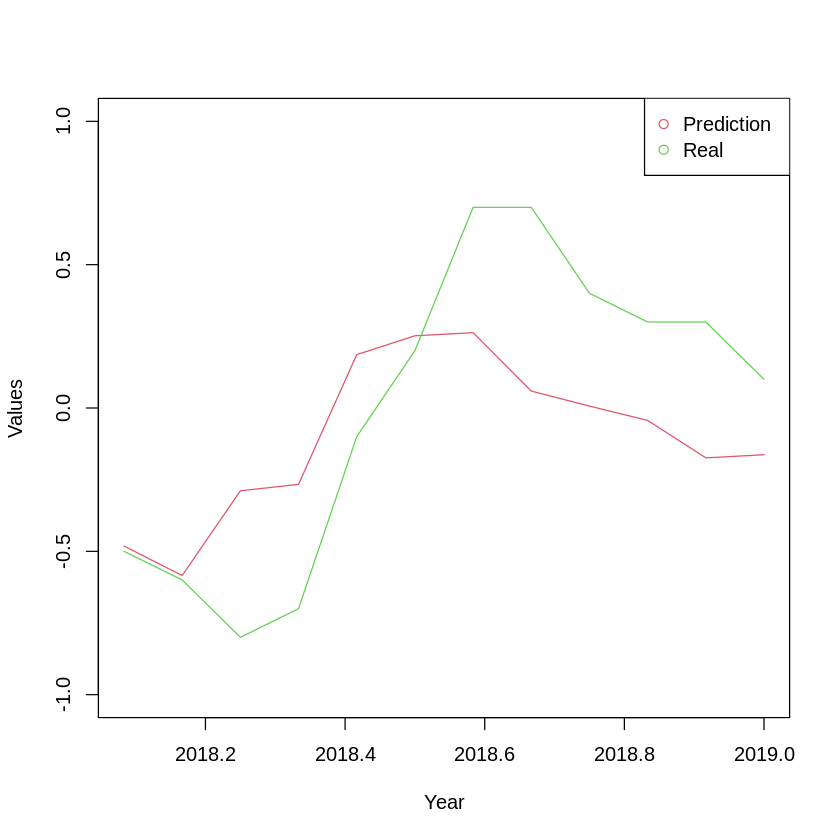

In [ ]:
plot(im2k_prediction$pred,
     type = "l",
     col = 2,
     ylim = c(-1, 1),
     xlab = "Year",
     ylab = "Values")
lines(im2k_test,
      type = "l",
      col = 3)
legend("topright", legend = c("Prediction", "Real"), col=c(2, 3), pch=1)

In [ ]:
RMSE <- c(rmse(im2k_test, im2k_prediction$pred))
MAE <- c(mae(im2k_test, im2k_prediction$pred))

In [ ]:
print(c(RMSE, MAE))

[1] 0.3767294 0.3223909


## RMSE/MAE/AIC search

In [ ]:
im_arimas <- createArimas(im2k_learn, im2k_test, 5, 5, 5)

In [ ]:
bestModels <- rbind(
  im_arimas[which.min(im_arimas$AIC),],
  im_arimas[which.min(im_arimas$RMSE),],
  im_arimas[which.min(im_arimas$MAE),]
)
bestModels

,p,d,q,RMSE,MAE,AIC
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
24,3,0,5,0.3476703,0.3111410,-40.34239
16,2,0,3,0.3181586,0.2944253,-28.05165
161,2,0,3,0.3181586,0.2944253,-28.05165


ARIMA(3, 0, 5)

ARIMA(2, 0, 3)

In [ ]:
arima305 <- predict(Arima(im2k_learn, order=c(3, 0, 5)), n.ahead = 12)
arima203 = predict(Arima(im2k_learn, order=c(2, 0, 3)), n.ahead = 12)

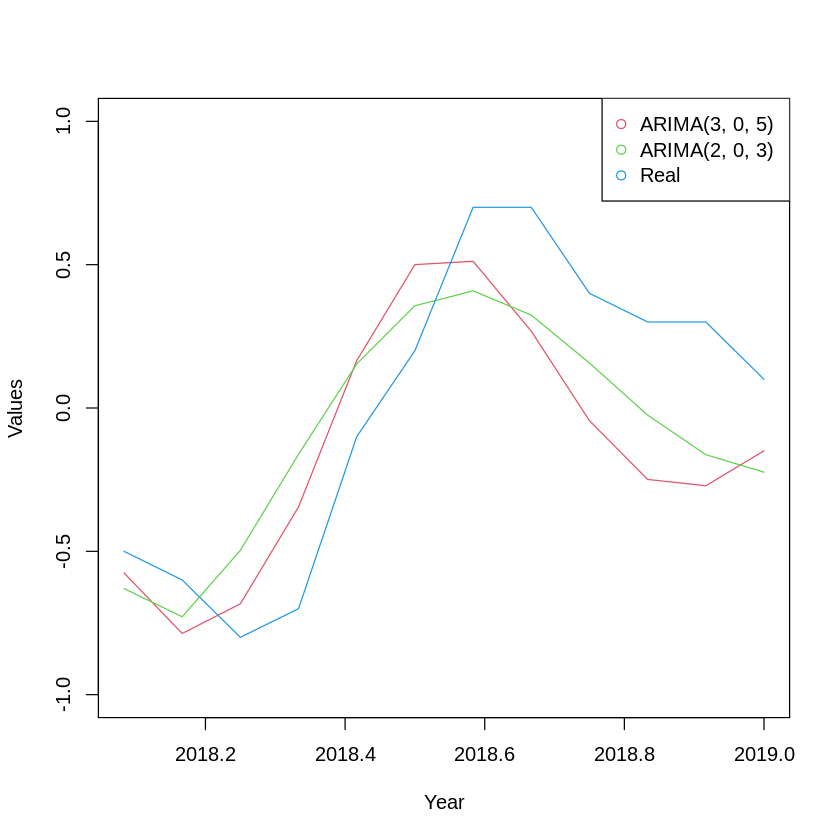

In [ ]:
plot(arima305$pred,
     type = "l",
     col = 2,
     ylim = c(-1, 1),
     xlab = "Year",
     ylab = "Values")
lines(arima203$pred,
      type = "l",
      col = 3)
lines(im2k_test,
      type = "l",
      col = 4)
legend("topright", legend = c("ARIMA(3, 0, 5)", "ARIMA(2, 0, 3)", "Real"), col=c(2, 3, 4), pch=1)

Наиболее точно предсказать индекс денежных доходов населения может $ARIMA(2, 0, 3)$, ее график почти идентично описывает поведение с настоящими данными, показывая как подъем так и падение доходов, в то время как $ARIMA(3, 0, 5)$ под конец показывает некоторый подъем

# Индекс реального ВВП, с поправкой на сезонность

## Временной ряд

In [ ]:
hhi <- ts(sophisthse("GDPEA_Q_DIRI")[, "GDPEA_Q_DIRI_SA"], frequency=4)

In [ ]:
hhi

,Qtr1,Qtr2,Qtr3,Qtr4
1,107.9,109.1,110.7,113.0
2,115.6,117.9,119.2,120.5
3,122.3,124.4,126.7,129.0
4,131.6,134.4,137.1,139.9
5,142.7,145.6,148.7,152.5
6,156.4,158.5,156.2,149.9
7,143.5,142.6,144.0,146.0
8,147.8,149.2,150.6,151.9
9,153.4,155.4,157.3,159.0
10,160.8,161.8,162.3,163.0


Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


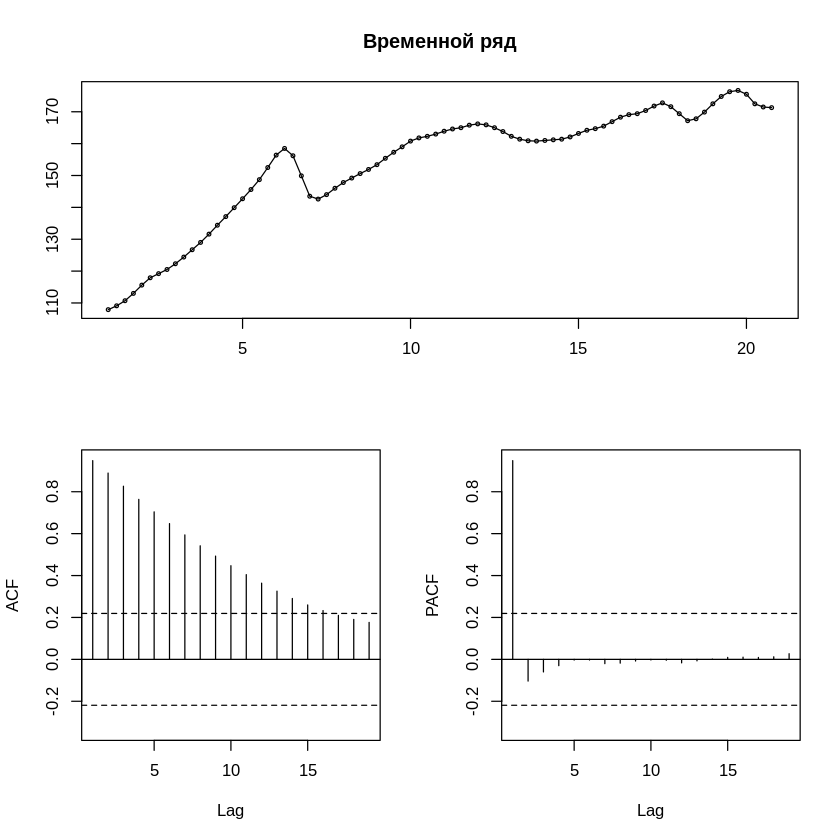

In [ ]:
tsdisplay(hhi, main = 'Временной ряд', ci.col = "black")

In [ ]:
adf.test(hhi)


	Augmented Dickey-Fuller Test

data:  hhi
Dickey-Fuller = -2.389, Lag order = 4, p-value = 0.4165
alternative hypothesis: stationary


ACF снижается слишком медленно, много ненулевых автокорреляций. p > 0.05. Ряд не станционарный

In [ ]:
hhi_diff <- diff(hhi)

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


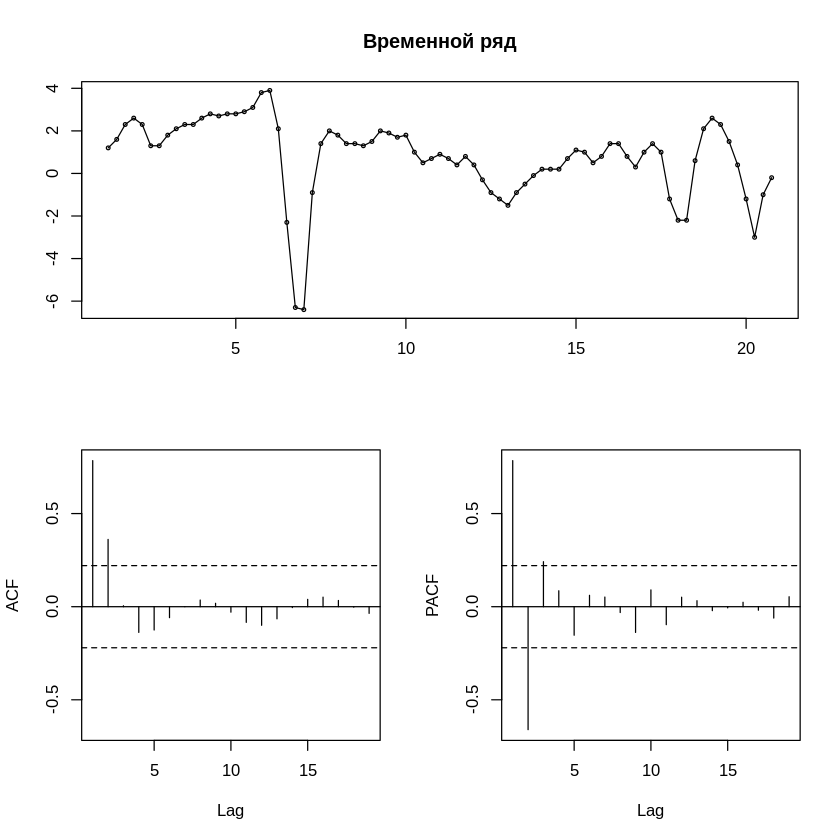

In [ ]:
tsdisplay(hhi_diff, main = 'Временной ряд', ci.col = "black")

In [ ]:
adf.test(hhi_diff)


	Augmented Dickey-Fuller Test

data:  hhi_diff
Dickey-Fuller = -3.9158, Lag order = 4, p-value = 0.0179
alternative hypothesis: stationary


ACF быстро снижается, уже на третьем лаге нулевая автокорреляция. p < 0.05. Наблюдается сезонность. Ряд станционарен, можно предположить ARIMA(2, 1, 3)

In [ ]:
hhi_test = tail(hhi_diff, 12)
hhi_learn = head(hhi_diff, -12)

## Поиск лучшей модели ARIMA.auto

In [ ]:
autohhi = auto.arima(hhi_learn, trace= TRUE, ic ="aicc", approximation = FALSE, stepwise = FALSE, seasonal=TRUE)
summary(autohhi)


 ARIMA(0,1,0)                              : 208.783
 ARIMA(0,1,0)           with drift         : 210.8459
 ARIMA(0,1,0)(0,0,1)[4]                    : 203.9598
 ARIMA(0,1,0)(0,0,1)[4] with drift         : 206.0032
 ARIMA(0,1,0)(0,0,2)[4]                    : 206.1544
 ARIMA(0,1,0)(0,0,2)[4] with drift         : 208.2713
 ARIMA(0,1,0)(1,0,0)[4]                    : 204.3677
 ARIMA(0,1,0)(1,0,0)[4] with drift         : 206.4465
 ARIMA(0,1,0)(1,0,1)[4]                    : 206.1534
 ARIMA(0,1,0)(1,0,1)[4] with drift         : 208.271
 ARIMA(0,1,0)(1,0,2)[4]                    : 207.6971
 ARIMA(0,1,0)(1,0,2)[4] with drift         : 209.8851
 ARIMA(0,1,0)(2,0,0)[4]                    : 206.3609
 ARIMA(0,1,0)(2,0,0)[4] with drift         : 208.501
 ARIMA(0,1,0)(2,0,1)[4]                    : 208.2667
 ARIMA(0,1,0)(2,0,1)[4] with drift         : 210.4392
 ARIMA(0,1,0)(2,0,2)[4]                    : 209.7803
 ARIMA(0,1,0)(2,0,2)[4] with drift         : 212.0177
 ARIMA(0,1,1)                 

Series: hhi_learn 
ARIMA(2,1,0) 

Coefficients:
         ar1      ar2
      0.8086  -0.5987
s.e.  0.1009   0.0990

sigma^2 = 0.6698:  log likelihood = -80
AIC=166   AICc=166.39   BIC=172.57

Training set error measures:
                      ME      RMSE       MAE       MPE    MAPE      MASE
Training set -0.03311771 0.7999027 0.4853963 -6.110215 47.3073 0.3432095
                    ACF1
Training set -0.03258992

Выбрана модель $ARIMA(2, 1, 0)$, коэффициенты значимые, $\sigma^2$ мал

In [ ]:
hhi_prediction = predict(autohhi, n.ahead = length(hhi_test))
hhi_prediction

,Qtr1,Qtr2,Qtr3,Qtr4
18,-2.7394259,-2.6670149,-1.6867764,-0.9375121
19,-0.9185485,-1.3518152,-1.7135073,-1.7465647
20,-1.5567421,-1.3834598,-1.3569950,-1.4393435
,Qtr1,Qtr2,Qtr3,Qtr4
18,0.8184357,1.6914167,2.2776089,2.5585255
19,2.6952910,2.8132260,2.9733724,3.1752988
20,3.3747766,3.5420323,3.6815147,3.8112940


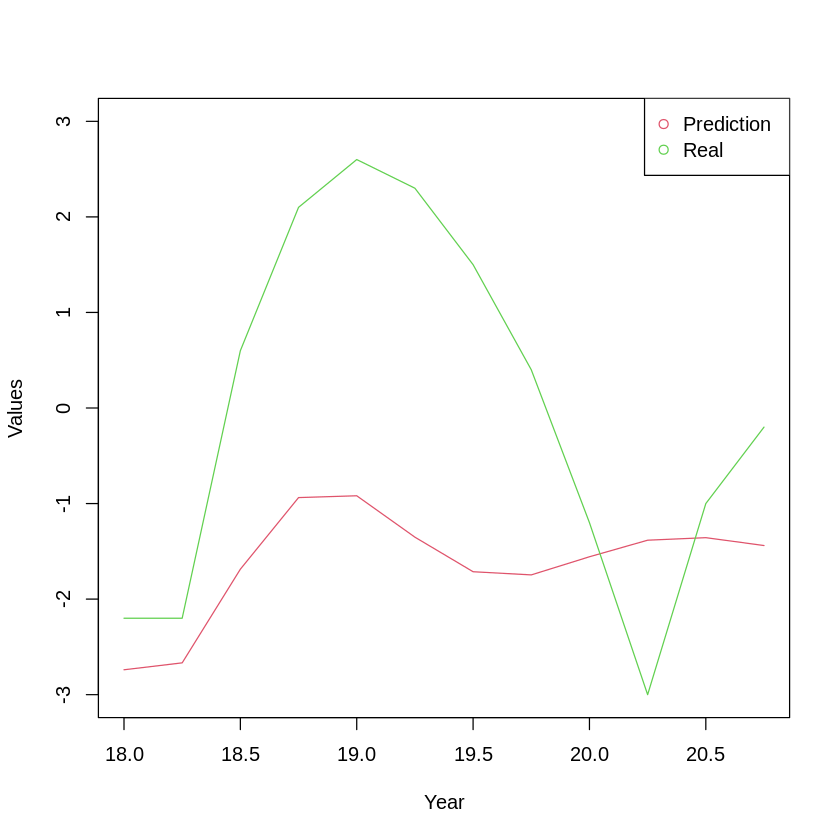

In [ ]:
plot(hhi_prediction$pred,
     type = "l",
     col = 2,
     ylim = c(-3, 3),
     xlab = "Year",
     ylab = "Values")
lines(hhi_test,
      type = "l",
      col = 3)
legend("topright", legend = c("Prediction", "Real"), col=c(2, 3), pch=1)

In [ ]:
RMSE <- c(rmse(hhi_test, hhi_prediction$pred))
MAE <- c(mae(hhi_test, hhi_prediction$pred))
print(c(RMSE, MAE))

[1] 2.236424 1.869232


## RMSE/MAE/AIC search

In [ ]:
hhi_arimas <- createArimas(hhi_learn, hhi_test, 5, 5, 5)

In [ ]:
bestModels <- rbind(
  hhi_arimas[which.min(hhi_arimas$AIC),],
  hhi_arimas[which.min(hhi_arimas$RMSE),],
  hhi_arimas[which.min(hhi_arimas$MAE),]
)
bestModels

,p,d,q,RMSE,MAE,AIC
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
19,3,0,0,1.560787,1.244242,164.8527
51,2,1,2,1.410388,1.135323,166.2201
511,2,1,2,1.410388,1.135323,166.2201


ARIMA(3, 0, 0)

ARIMA(2, 1, 2)

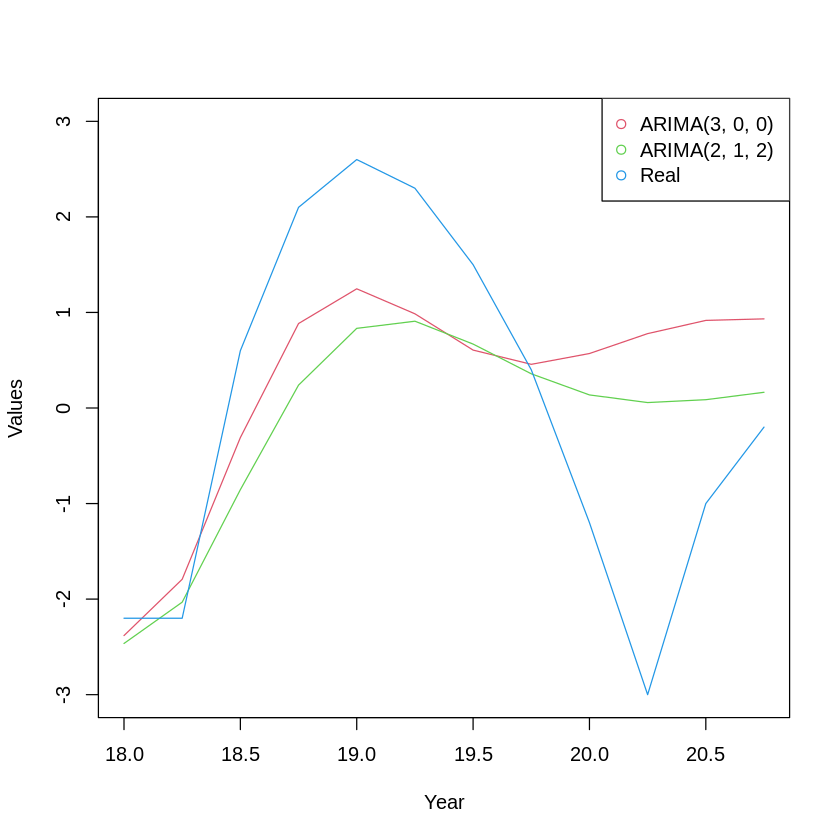

In [ ]:
arima300 <- predict(Arima(hhi_learn, order=c(3, 0, 0)), n.ahead = 12)
arima212 <- predict(Arima(hhi_learn, order=c(2, 1, 2)), n.ahead = 12)
plot(arima300$pred,
     type = "l",
     col = 2,
     ylim = c(-3, 3),
     xlab = "Year",
     ylab = "Values")
lines(arima212$pred,
      type = "l",
      col = 3)
lines(hhi_test,
      type = "l",
      col = 4)
legend("topright", legend = c("ARIMA(3, 0, 0)", "ARIMA(2, 1, 2)", "Real"), col=c(2, 3, 4), pch=1)

#[Monthly gold prices since 1950 in USD (London market)](https://github.com/datasets/gold-prices)

In [ ]:
sh("wget https://raw.githubusercontent.com/datasets/gold-prices/main/data/monthly.csv -O gold_m.csv")

In [ ]:
sh("ls gold_m.csv")

gold_m.csv

In [ ]:
gold <- read.csv('gold_m.csv')$Price

## Временной ряд

In [ ]:
gold <- ts(gold, frequency=12)

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


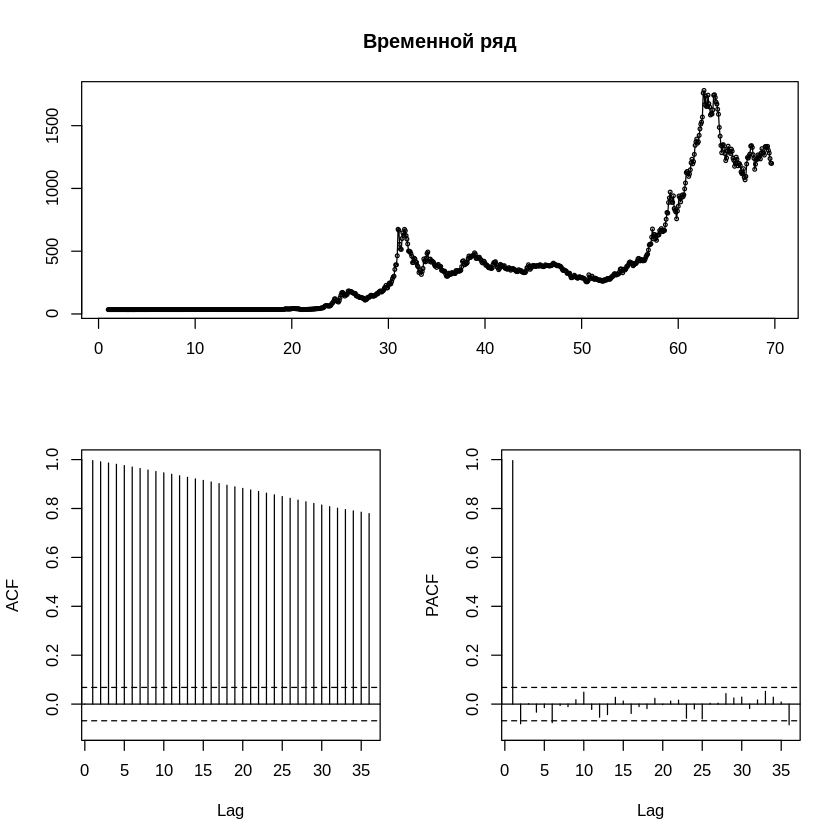

In [ ]:
tsdisplay(gold, main = 'Временной ряд', ci.col = "black")

Цена до 25 года особо не меняется

In [ ]:
gold2 <- window(gold, start = 25)

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


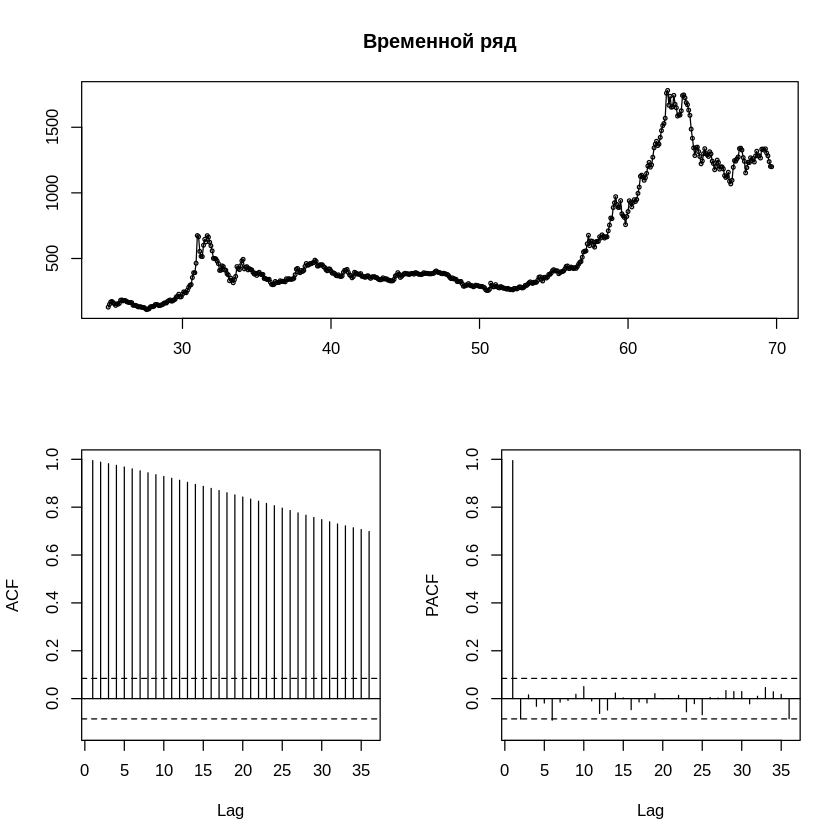

In [ ]:
tsdisplay(gold2, main = 'Временной ряд', ci.col = "black")

Автокорелляция снижается слишком медленно, нет нулевых коэффициентов. Ряд не станционарный, наблюдается некоторая сезонность в частных автокорреляциях.

In [ ]:
gold_diff <- diff(gold2)

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


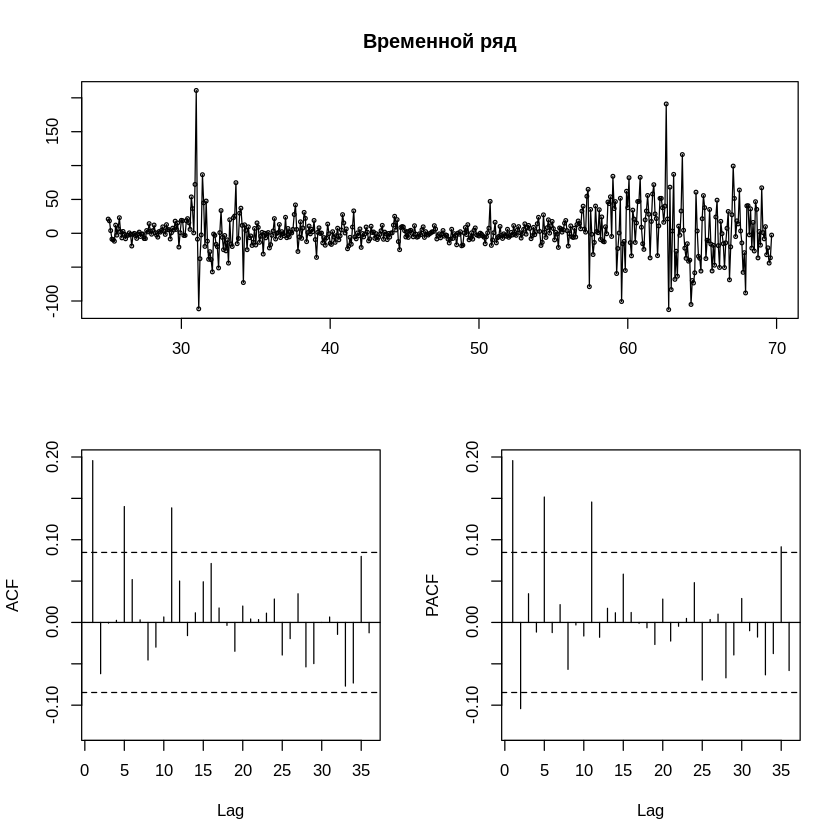

In [ ]:
tsdisplay(gold_diff, main = 'Временной ряд', ci.col = "black")

Автокорреляция быстро снижается, видна зависимость между ACF и PACF. Наблюдается сезонность. ARMA(3, 5)

In [ ]:
gold_test = tail(gold_diff, 12)
gold_learn = head(gold_diff, -12)

## Поиск лучшей модели ARIMA.auto

In [ ]:
autogold = auto.arima(gold_learn, trace= TRUE, ic ="aicc", approximation = FALSE, stepwise = FALSE, seasonal=TRUE)
summary(autogold)


 ARIMA(0,0,0)            with zero mean     : 5048.337
 ARIMA(0,0,0)            with non-zero mean : 5047.322
 ARIMA(0,0,0)(0,0,1)[12] with zero mean     : 5049.469
 ARIMA(0,0,0)(0,0,1)[12] with non-zero mean : 5048.67
 ARIMA(0,0,0)(0,0,2)[12] with zero mean     : 5050.263
 ARIMA(0,0,0)(0,0,2)[12] with non-zero mean : 5049.715
 ARIMA(0,0,0)(1,0,0)[12] with zero mean     : 5049.393
 ARIMA(0,0,0)(1,0,0)[12] with non-zero mean : 5048.619
 ARIMA(0,0,0)(1,0,1)[12] with zero mean     : 5051.122
 ARIMA(0,0,0)(1,0,1)[12] with non-zero mean : 5050.457
 ARIMA(0,0,0)(1,0,2)[12] with zero mean     : 5052.21
 ARIMA(0,0,0)(1,0,2)[12] with non-zero mean : 5051.647
 ARIMA(0,0,0)(2,0,0)[12] with zero mean     : 5050.534
 ARIMA(0,0,0)(2,0,0)[12] with non-zero mean : 5049.957
 ARIMA(0,0,0)(2,0,1)[12] with zero mean     : 5052.48
 ARIMA(0,0,0)(2,0,1)[12] with non-zero mean : 5051.893
 ARIMA(0,0,0)(2,0,2)[12] with zero mean     : 5050.904
 ARIMA(0,0,0)(2,0,2)[12] with non-zero mean : Inf
 ARIMA(0,0,1)    

Series: gold_learn 
ARIMA(0,0,5) with zero mean 

Coefficients:
         ma1      ma2     ma3      ma4     ma5
      0.2305  -0.0793  0.0307  -0.0162  0.1481
s.e.  0.0433   0.0445  0.0436   0.0465  0.0459

sigma^2 = 830.6:  log likelihood = -2502.32
AIC=5016.64   AICc=5016.8   BIC=5042.21

Training set error measures:
                   ME     RMSE      MAE      MPE     MAPE      MASE        ACF1
Training set 1.729087 28.68162 17.75662 91.05766 200.0524 0.6775845 0.001015319

In [ ]:
gold_prediction = predict(autogold, n.ahead = length(gold_test))
gold_prediction

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
68,,,,,,,,,,-4.408142,2.943995,-5.470967
69,7.905420,2.119957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,,,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
68,,,,,,,,,,28.81945,29.57544,29.66356
69,29.67676,29.68044,29.98593,29.98593,29.98593,29.98593,29.98593,29.98593,29.98593,,,


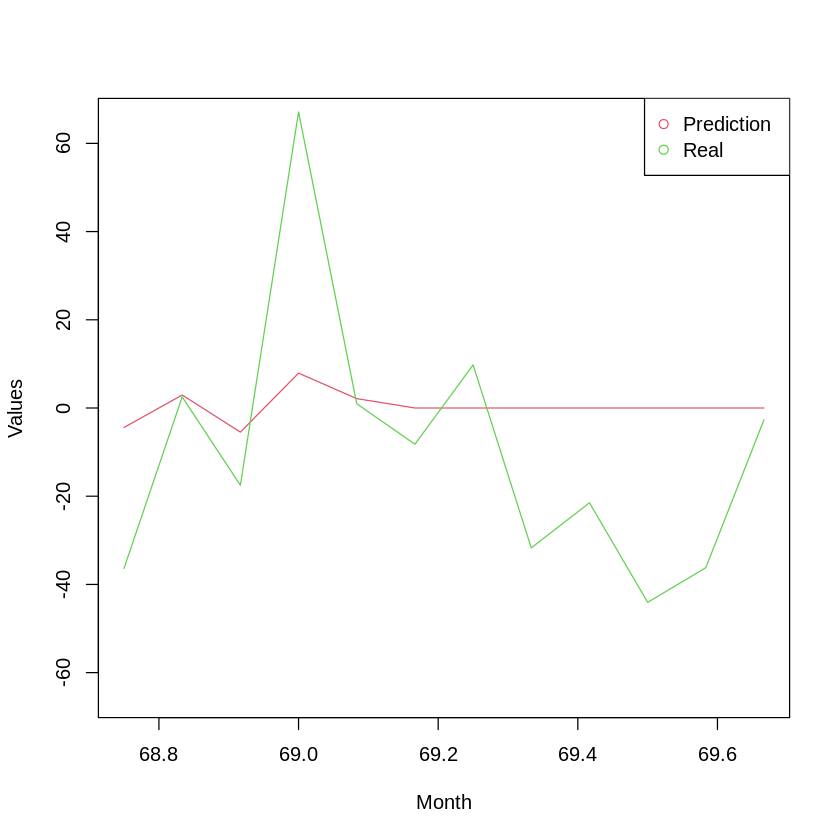

In [ ]:
plot(gold_prediction$pred,
     type = "l",
     col = 2,
     ylim = c(-65, 65),
     xlab = "Month",
     ylab = "Values")
lines(gold_test,
      type = "l",
      col = 3)
legend("topright", legend = c("Prediction", "Real"), col=c(2, 3), pch=1)

## RMSE/MAE/AIC search

In [ ]:
arimas <- createArimas(gold_learn, gold_test, 5, 5, 5)

In [ ]:
bestModels <- rbind(
  arimas[which.min(arimas$AIC),],
  arimas[which.min(arimas$RMSE),],
  arimas[which.min(arimas$MAE),]
)
bestModels

,p,d,q,RMSE,MAE,AIC
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
72,5,1,5,30.66174,25.68435,5010.683
180,5,4,5,25.92316,20.21678,5143.479
179,5,4,4,25.99089,18.76202,5137.766


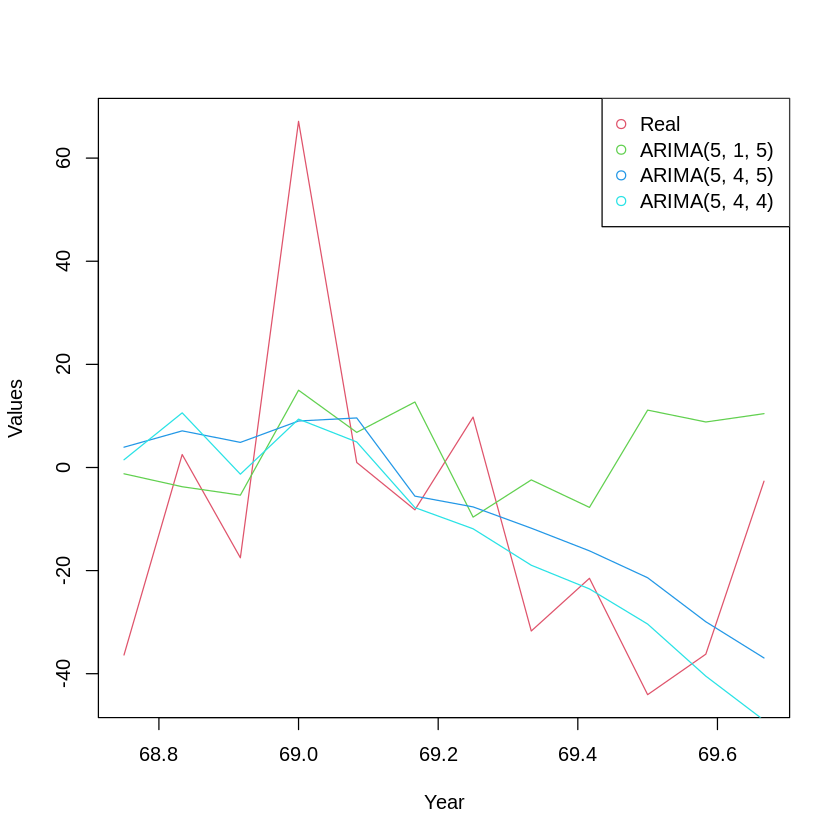

In [ ]:
arima515 <- predict(Arima(gold_learn, order=c(5, 1, 5)), n.ahead = 12)
arima545 <- predict(Arima(gold_learn, order=c(5, 4, 5)), n.ahead = 12)
arima544 <- predict(Arima(gold_learn, order=c(5, 4, 4)), n.ahead = 12)
plot(gold_test,
     type = "l",
     col = 2,
     #ylim = c(-20, 20),
     xlab = "Year",
     ylab = "Values")
lines(arima515$pred,
      type = "l",
      col = 3)
lines(arima545$pred,
      type = "l",
      col = 4)
lines(arima544$pred,
      type = "l",
      col = 5)
legend("topright", legend = c("Real", "ARIMA(5, 1, 5)", "ARIMA(5, 4, 5)", "ARIMA(5, 4, 4)"), col=c(2, 3, 4, 5), pch=1)

#[Europe Brent and WTI (Western Texas Intermediate) Spot Prices](https://github.com/datasets/oil-prices)

In [ ]:
sh("wget https://raw.githubusercontent.com/datasets/oil-prices/main/data/brent-monthly.csv -O brent_m.csv")

## Временной ряд

In [ ]:
brent <- ts(read.csv('brent_m.csv')$Price, frequency=12)

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


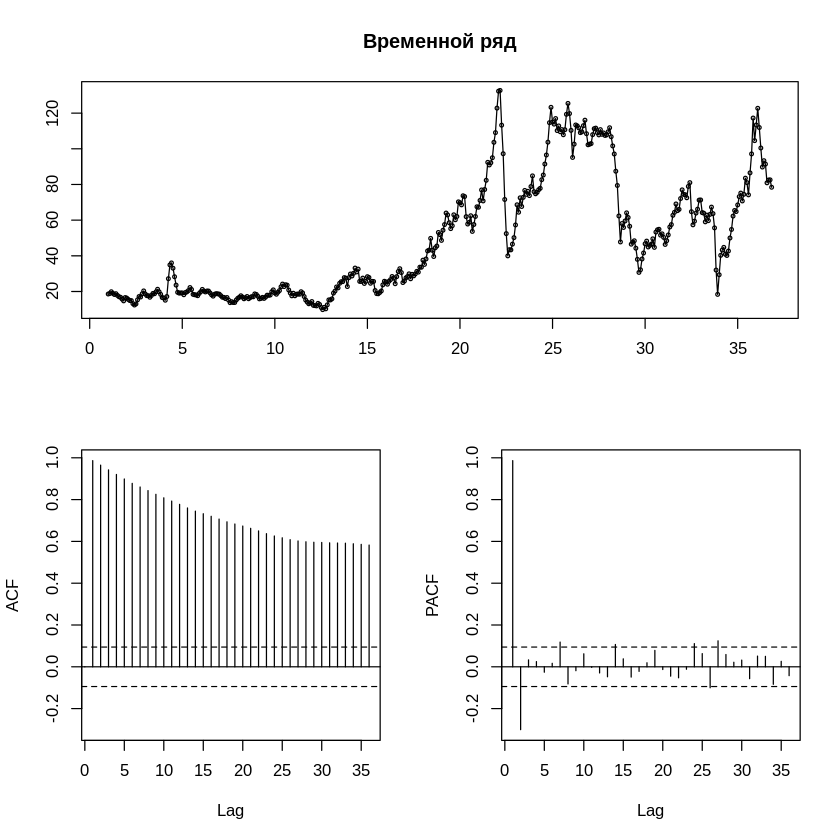

In [ ]:
tsdisplay(brent, main = 'Временной ряд', ci.col = "black")

До 15 года цена меняется не сильно

In [ ]:
brent2 <- window(brent, start = 15)

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


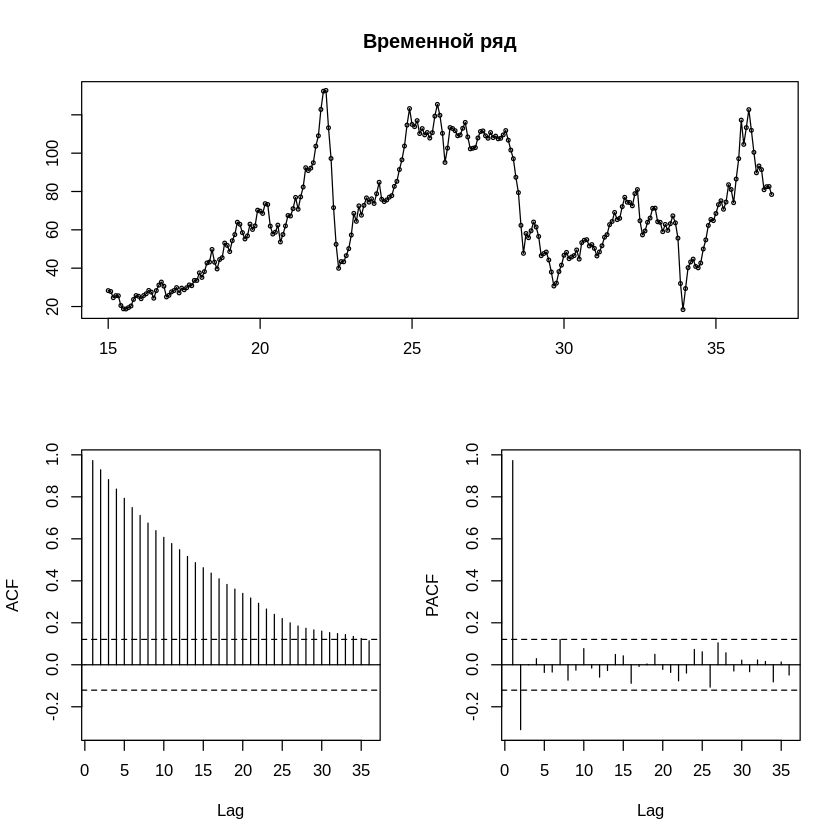

In [ ]:
tsdisplay(brent2, main = 'Временной ряд', ci.col = "black")

Наблюдается сезонность, ACF снижается слишком медленно, ряд не станционарный

In [ ]:
brent_diff <- diff(brent2)

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


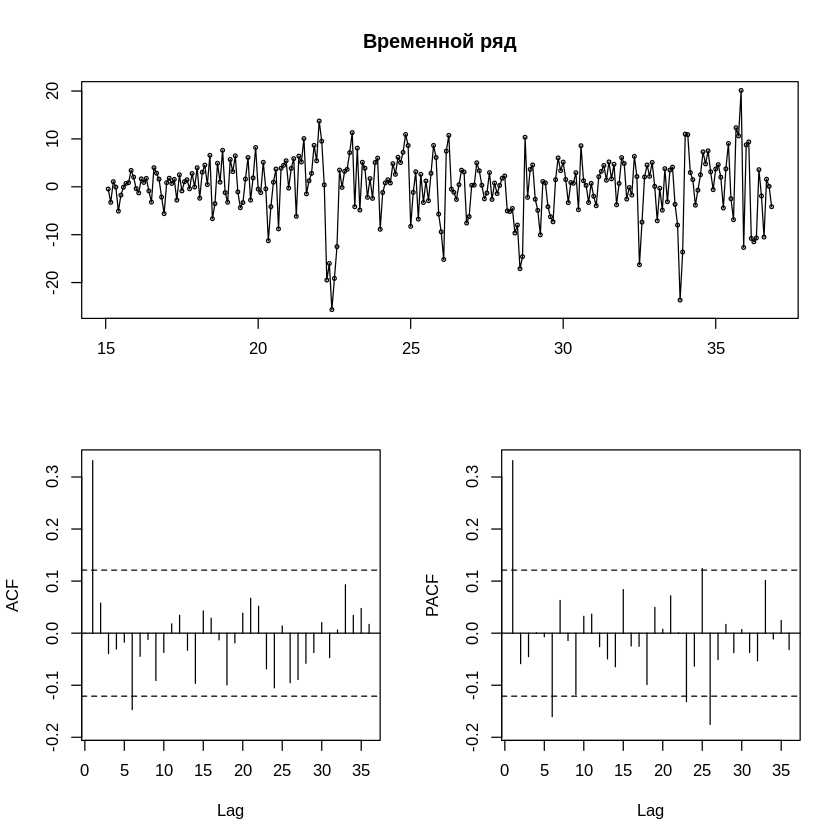

In [ ]:
tsdisplay(brent_diff, main = 'Временной ряд', ci.col = "black")

Наблюдается явная сезонность, ACF резко снижается до 0, есть некоторая зависимость между ACF и PACF. ARMA(2, 3)?

In [ ]:
brent_test = tail(brent_diff, 12)
brent_learn = head(brent_diff, -12)

## Поиск лучшей модели ARIMA.auto

In [ ]:
autobrent = auto.arima(brent_learn, trace= TRUE, ic ="aicc", approximation = FALSE, stepwise = FALSE, seasonal=TRUE)
summary(autobrent)


 ARIMA(0,0,0)            with zero mean     : 1620.679
 ARIMA(0,0,0)            with non-zero mean : 1621.877
 ARIMA(0,0,0)(0,0,1)[12] with zero mean     : 1622.441
 ARIMA(0,0,0)(0,0,1)[12] with non-zero mean : 1623.686
 ARIMA(0,0,0)(0,0,2)[12] with zero mean     : 1618.861
 ARIMA(0,0,0)(0,0,2)[12] with non-zero mean : 1620.051
 ARIMA(0,0,0)(1,0,0)[12] with zero mean     : 1622.522
 ARIMA(0,0,0)(1,0,0)[12] with non-zero mean : 1623.758
 ARIMA(0,0,0)(1,0,1)[12] with zero mean     : 1622.265
 ARIMA(0,0,0)(1,0,1)[12] with non-zero mean : 1623.548
 ARIMA(0,0,0)(1,0,2)[12] with zero mean     : 1620.879
 ARIMA(0,0,0)(1,0,2)[12] with non-zero mean : 1622.091
 ARIMA(0,0,0)(2,0,0)[12] with zero mean     : 1619.029
 ARIMA(0,0,0)(2,0,0)[12] with non-zero mean : 1620.222
 ARIMA(0,0,0)(2,0,1)[12] with zero mean     : 1620.696
 ARIMA(0,0,0)(2,0,1)[12] with non-zero mean : 1621.93
 ARIMA(0,0,0)(2,0,2)[12] with zero mean     : Inf
 ARIMA(0,0,0)(2,0,2)[12] with non-zero mean : Inf
 ARIMA(0,0,1)       

Series: brent_learn 
ARIMA(0,0,2)(2,0,0)[12] with zero mean 

Coefficients:
         ma1     ma2    sar1     sar2
      0.4238  0.1702  0.0374  -0.1839
s.e.  0.0620  0.0687  0.0645   0.0641

sigma^2 = 31.34:  log likelihood = -783.83
AIC=1577.66   AICc=1577.91   BIC=1595.27

Training set error measures:
                    ME     RMSE      MAE     MPE    MAPE      MASE
Training set 0.2405181 5.552822 4.248318 97.3637 163.706 0.6844796
                      ACF1
Training set -0.0004029382

In [ ]:
brent_prediction = predict(autobrent, n.ahead = length(brent_test))
brent_prediction

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
35,,,,,,,,,,,,8.0307002
36,0.1023080,-1.8298774,-0.4711090,-0.4412122,0.8443463,0.4709088,-0.5529630,-1.6000358,-0.4176806,-0.9841499,0.1767881,
,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
35,,,,,,,,,,,,5.597784
36,6.079738,6.153958,6.153958,6.153958,6.153958,6.153958,6.153958,6.153958,6.153958,6.153958,6.153958,


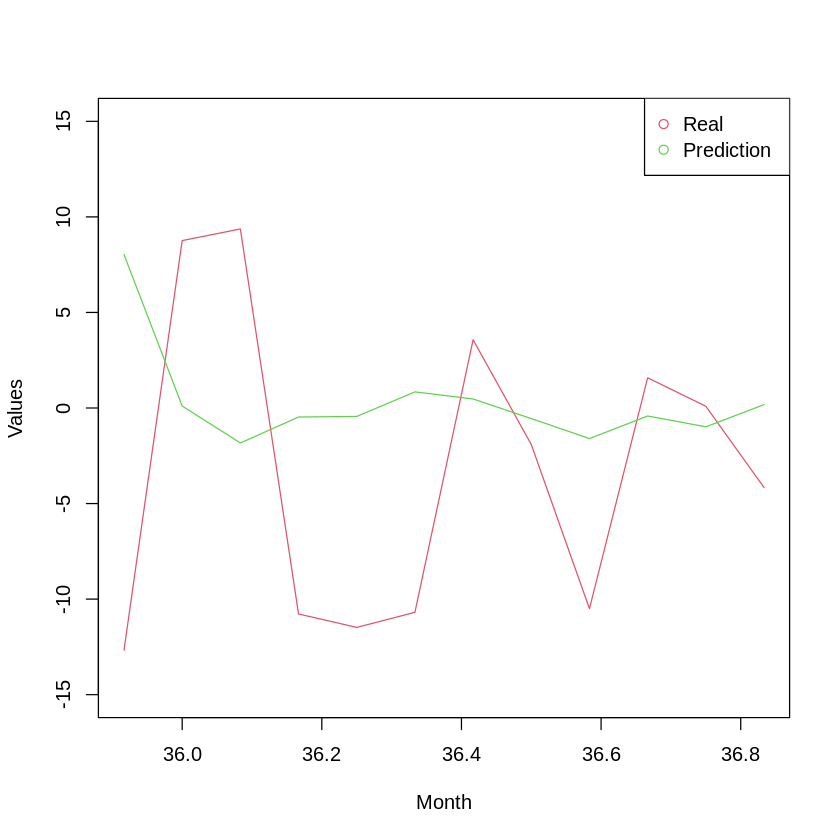

In [ ]:
plot(brent_test,
     type = "l",
     col = 2,
     ylim = c(-15, 15),
     xlab = "Month",
     ylab = "Values")
lines(brent_prediction$pred,
      type = "l",
      col = 3)
legend("topright", legend = c("Real", "Prediction"), col=c(2, 3), pch=1)

## RMSE/MAE/AIC search

In [ ]:
arimas <- createArimas(brent_learn, brent_test, 5, 5, 5)

In [ ]:
bestModels <- rbind(
  arimas[which.min(arimas$AIC),],
  arimas[which.min(arimas$RMSE),],
  arimas[which.min(arimas$MAE),]
)
bestModels

,p,d,q,RMSE,MAE,AIC
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
47,1,1,4,9.584166,7.586652,1579.610
38,0,1,1,8.480032,7.233587,1621.876
72,5,1,5,9.156109,7.048801,1580.680


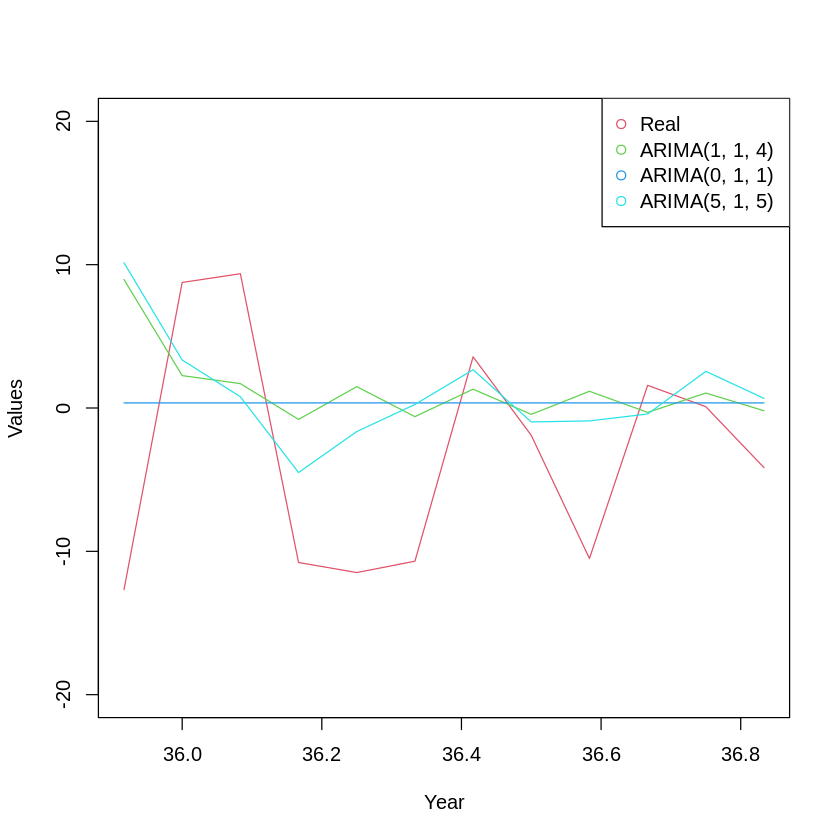

In [ ]:
arima114 <- predict(Arima(brent_learn, order=c(1, 1, 4)), n.ahead = 12)
arima011 <- predict(Arima(brent_learn, order=c(0, 1, 1)), n.ahead = 12)
arima515 <- predict(Arima(brent_learn, order=c(5, 1, 5)), n.ahead = 12)
plot(brent_test,
     type = "l",
     col = 2,
     ylim = c(-20, 20),
     xlab = "Year",
     ylab = "Values")
lines(arima114$pred,
      type = "l",
      col = 3)
lines(arima011$pred,
      type = "l",
      col = 4)
lines(arima515$pred,
      type = "l",
      col = 5)
legend("topright", legend = c("Real", "ARIMA(1, 1, 4)", "ARIMA(0, 1, 1)", "ARIMA(5, 1, 5)"), col=c(2, 3, 4, 5), pch=1)

Похожее поведение как у настоящих цен наблюдается у $ARIMA(5, 1, 5)$, но не с настолько высокими подъемами и падениями. 

#[Time series of major Natural Gas Prices](https://github.com/datasets/natural-gas)

In [ ]:
sh("wget https://raw.githubusercontent.com/datasets/natural-gas/master/data/monthly.csv -O gas_m.csv")

## Временной ряд

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


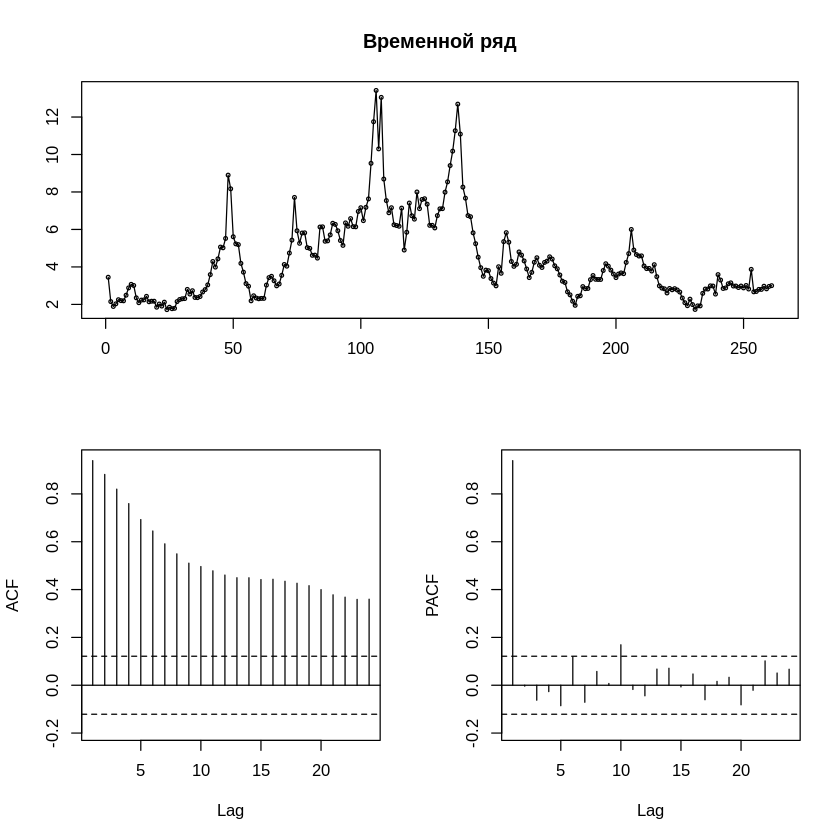

In [ ]:
gas <- ts(read.csv('gas_m.csv')$Price)
tsdisplay(gas, main = 'Временной ряд', ci.col = "black")

In [ ]:
gas_diff2 <- diff(diff(gas))

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


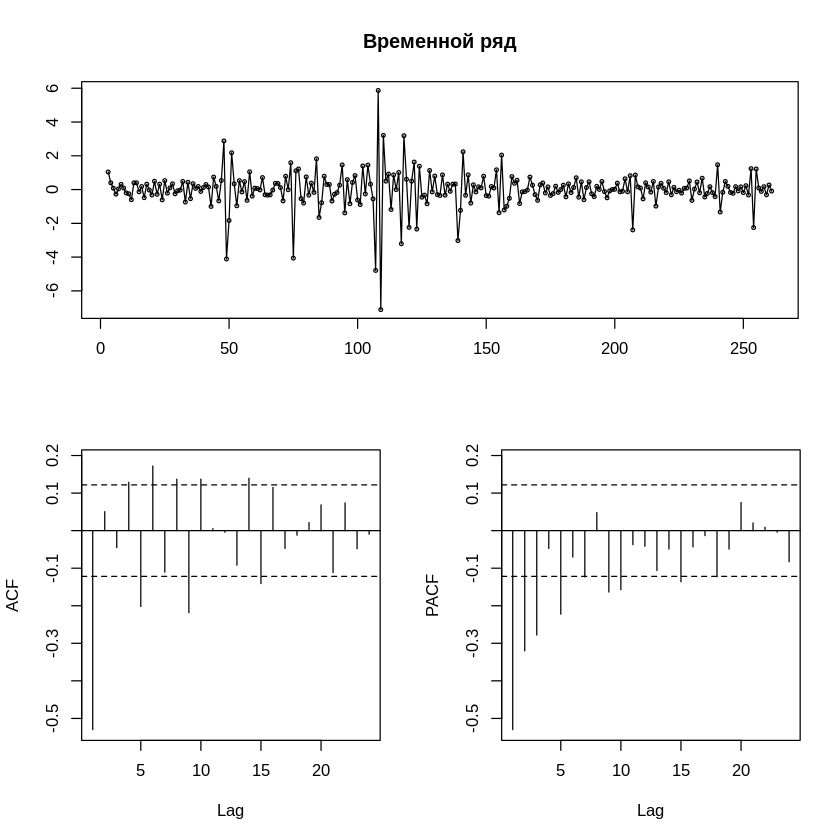

In [ ]:
tsdisplay(gas_diff2, main = 'Временной ряд', ci.col = "black")

ACF быстро снижается до 0, видна сезонность. 

In [ ]:
gas_test = tail(gas_diff2, 12)
gas_learn = head(gas_diff2, -12)

## Поиск лучшей модели ARIMA.auto

In [ ]:
autogas = auto.arima(gas_learn, trace= TRUE, ic ="aicc", approximation = FALSE, stepwise = FALSE, seasonal=TRUE)
summary(autogas)


 ARIMA(0,0,0) with zero mean     : 753.9104
 ARIMA(0,0,0) with non-zero mean : 755.937
 ARIMA(0,0,1) with zero mean     : Inf
 ARIMA(0,0,1) with non-zero mean : Inf
 ARIMA(0,0,2) with zero mean     : Inf
 ARIMA(0,0,2) with non-zero mean : Inf
 ARIMA(0,0,3) with zero mean     : Inf
 ARIMA(0,0,3) with non-zero mean : Inf
 ARIMA(0,0,4) with zero mean     : Inf
 ARIMA(0,0,4) with non-zero mean : Inf
 ARIMA(0,0,5) with zero mean     : Inf
 ARIMA(0,0,5) with non-zero mean : Inf
 ARIMA(1,0,0) with zero mean     : 676.4749
 ARIMA(1,0,0) with non-zero mean : 678.5145
 ARIMA(1,0,1) with zero mean     : Inf
 ARIMA(1,0,1) with non-zero mean : Inf
 ARIMA(1,0,2) with zero mean     : Inf
 ARIMA(1,0,2) with non-zero mean : Inf
 ARIMA(1,0,3) with zero mean     : Inf
 ARIMA(1,0,3) with non-zero mean : Inf
 ARIMA(1,0,4) with zero mean     : Inf
 ARIMA(1,0,4) with non-zero mean : Inf
 ARIMA(2,0,0) with zero mean     : 651.6004
 ARIMA(2,0,0) with non-zero mean : 653.656
 ARIMA(2,0,1) with zero mean     : 

Series: gas_learn 
ARIMA(5,0,0) with zero mean 

Coefficients:
          ar1      ar2      ar3      ar4      ar5
      -0.8133  -0.6224  -0.4509  -0.2368  -0.2314
s.e.   0.0621   0.0796   0.0841   0.0792   0.0615

sigma^2 = 0.7046:  log likelihood = -305.25
AIC=622.5   AICc=622.85   BIC=643.55

Training set error measures:
                     ME      RMSE       MAE MPE MAPE     MASE        ACF1
Training set 0.01138597 0.8308526 0.5112469 NaN  Inf 0.457833 -0.01538505

In [ ]:
gas_prediction = predict(autogas, n.ahead = length(gas_test))
gas_prediction

$pred
Time Series:
Start = 250 
End = 261 
Frequency = 1 
 [1] -0.0655476102  0.0004442415 -0.0520997862  0.0522686002 -0.0317820300
 [6]  0.0318704312 -0.0174708535  0.0083802076 -0.0148797900  0.0145694572
[11] -0.0096036290  0.0075098812

$se
Time Series:
Start = 250 
End = 261 
Frequency = 1 
 [1] 0.8393919 1.0819428 1.0824389 1.0826189 1.0850483 1.0915140 1.1083786
 [8] 1.1157214 1.1158332 1.1158683 1.1164758 1.1174174

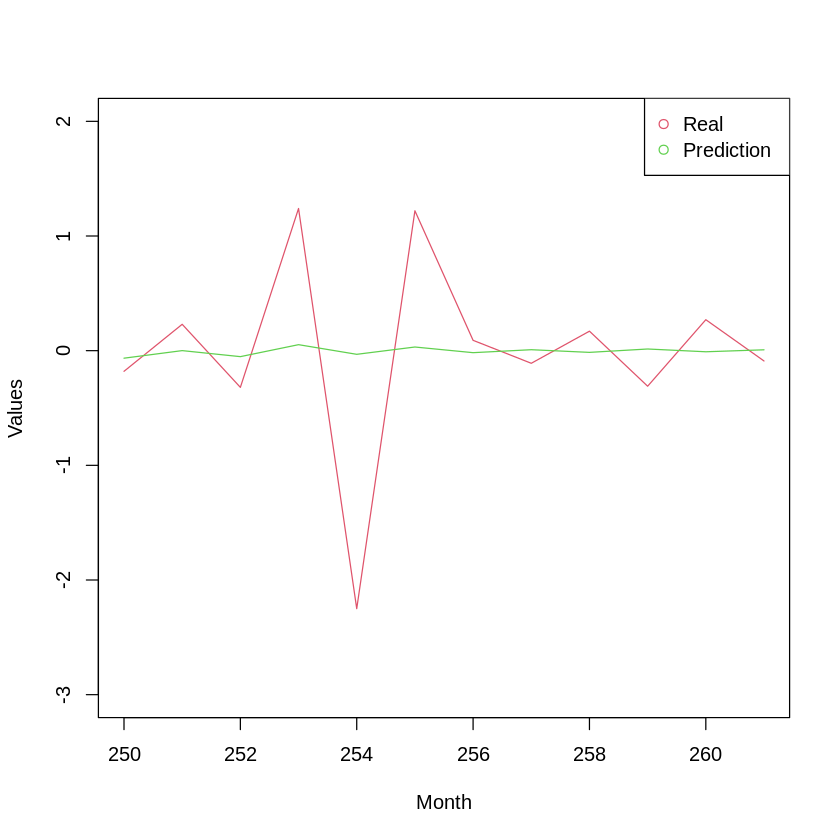

In [ ]:
plot(gas_test,
     type = "l",
     col = 2,
     ylim = c(-3, 2),
     xlab = "Month",
     ylab = "Values")
lines(gas_prediction$pred,
      type = "l",
      col = 3)
legend("topright", legend = c("Real", "Prediction"), col=c(2, 3), pch=1)

## RMSE/MAE/AIC search

In [ ]:
arimas <- createArimas(gas_learn, gas_test, 5, 5, 5)
bestModels <- rbind(
  arimas[which.min(arimas$AIC),],
  arimas[which.min(arimas$RMSE),],
  arimas[which.min(arimas$MAE),]
)
bestModels

,p,d,q,RMSE,MAE,AIC
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
34,5,0,3,0.8409642,0.5314997,582.6221
103,5,2,0,0.8120687,0.5242890,835.8318
98,4,2,1,0.8293413,0.5134595,741.6475


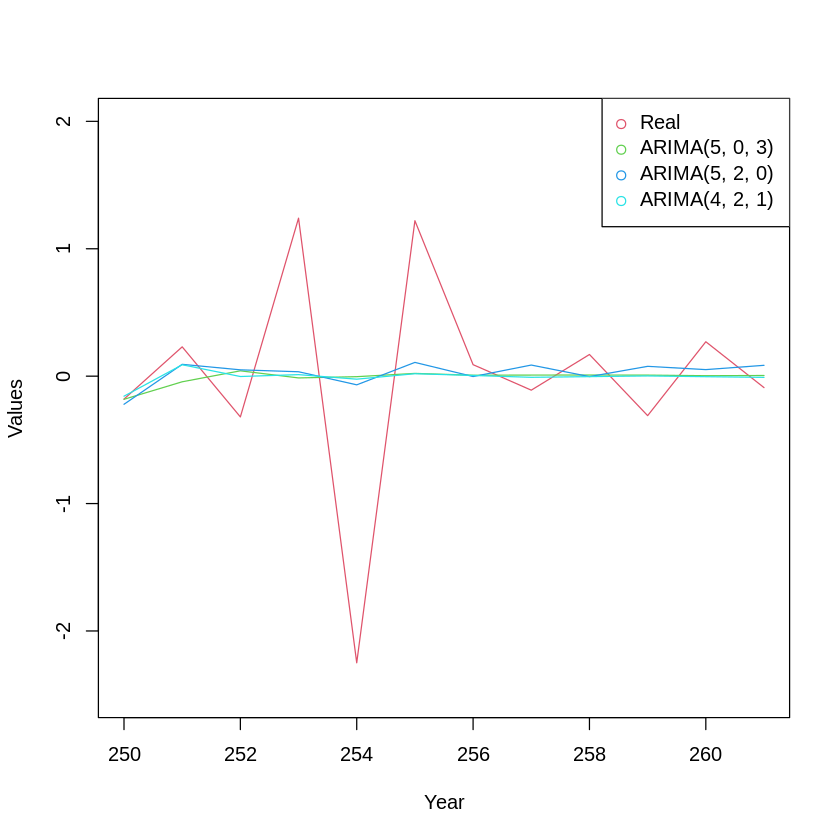

In [ ]:
arima114 <- predict(Arima(gas_learn, order=c(5, 0, 3)), n.ahead = 12)
arima011 <- predict(Arima(gas_learn, order=c(5, 2, 0)), n.ahead = 12)
arima515 <- predict(Arima(gas_learn, order=c(4, 2, 1)), n.ahead = 12)
plot(gas_test,
     type = "l",
     col = 2,
     ylim = c(-2.5, 2),
     xlab = "Year",
     ylab = "Values")
lines(arima114$pred,
      type = "l",
      col = 3)
lines(arima011$pred,
      type = "l",
      col = 4)
lines(arima515$pred,
      type = "l",
      col = 5)
legend("topright", legend = c("Real", "ARIMA(5, 0, 3)", "ARIMA(5, 2, 0)", "ARIMA(4, 2, 1)"), col=c(2, 3, 4, 5), pch=1)

#[Carbon Dioxide levels in the atmosphere](https://github.com/datasets/co2-ppm-daily)

In [ ]:
sh("wget https://raw.githubusercontent.com/datasets/co2-ppm-daily/master/data/co2-ppm-daily.csv -O cdl_d.csv")

## Временной ряд

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


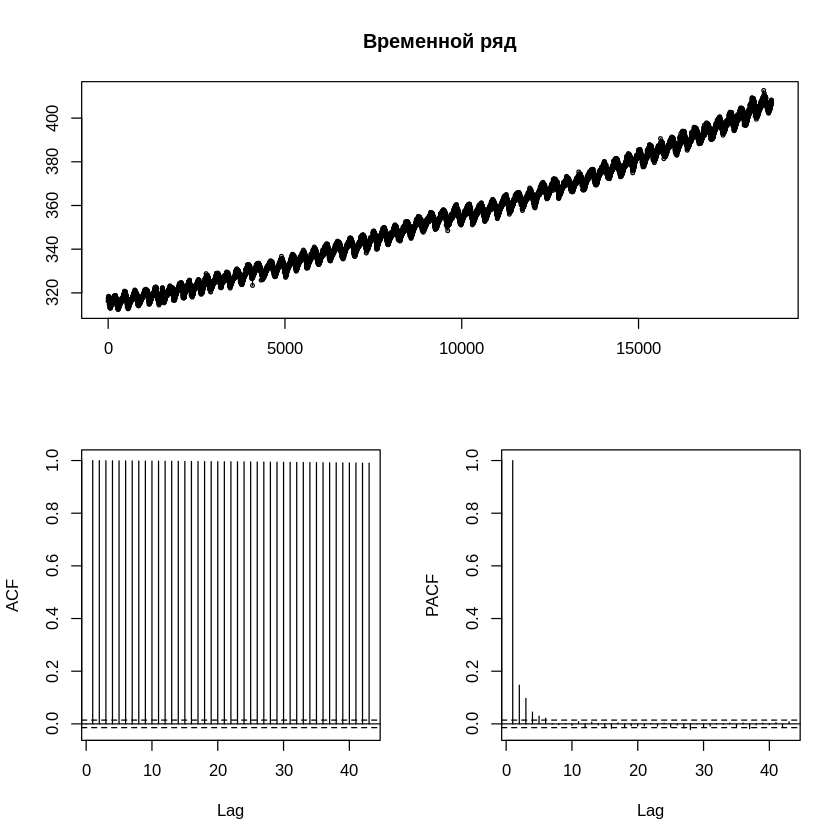

In [ ]:
cdl <- ts(read.csv('cdl_d.csv')$value)
tsdisplay(cdl, main = 'Временной ряд', ci.col = "black")

Явно видна сезонность и тренд, ряд не станционарный

In [ ]:
cdl_difflog <- diff(log(cdl))

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


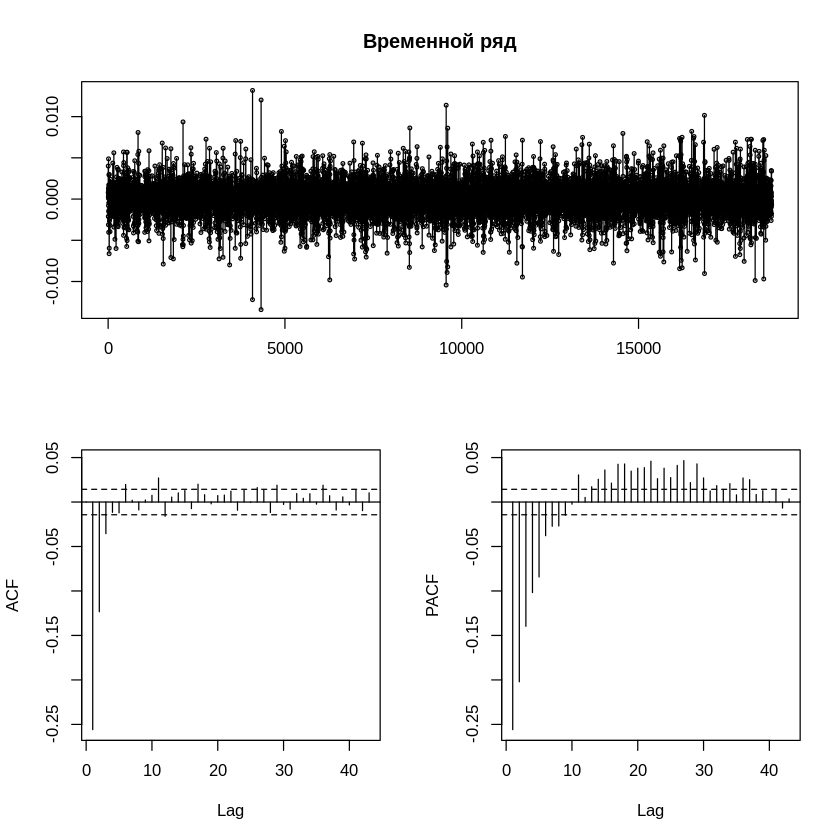

In [ ]:
tsdisplay(cdl_difflog, main = 'Временной ряд', ci.col = "black")

In [ ]:
adf.test(cdl_difflog)

Warning message in adf.test(cdl_difflog):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  cdl_difflog
Dickey-Fuller = -18.476, Lag order = 26, p-value = 0.01
alternative hypothesis: stationary


In [ ]:
cdl_test = tail(cdl_difflog, 24)
cdl_learn = head(cdl_difflog, -24)

## Поиск лучшей модели ARIMA.auto

In [ ]:
autocdl = auto.arima(cdl_learn, trace= TRUE, ic ="aicc", approximation = FALSE, stepwise = FALSE, seasonal=TRUE)
summary(autocdl)


 ARIMA(0,0,0) with zero mean     : -189698.8
 ARIMA(0,0,0) with non-zero mean : -189698.2
 ARIMA(0,0,1) with zero mean     : -191819.7
 ARIMA(0,0,1) with non-zero mean : -191822.7
 ARIMA(0,0,2) with zero mean     : -192429.5
 ARIMA(0,0,2) with non-zero mean : -192435.6
 ARIMA(0,0,3) with zero mean     : -192459.5
 ARIMA(0,0,3) with non-zero mean : -192466.1
 ARIMA(0,0,4) with zero mean     : -192457.5
 ARIMA(0,0,4) with non-zero mean : -192464.1
 ARIMA(0,0,5) with zero mean     : -192459.1
 ARIMA(0,0,5) with non-zero mean : -192465.6
 ARIMA(1,0,0) with zero mean     : -190966.9
 ARIMA(1,0,0) with non-zero mean : -190967.3
 ARIMA(1,0,1) with zero mean     : -192432.3
 ARIMA(1,0,1) with non-zero mean : -192439.1
 ARIMA(1,0,2) with zero mean     : -192456.5
 ARIMA(1,0,2) with non-zero mean : -192463.1
 ARIMA(1,0,3) with zero mean     : -192456.9
 ARIMA(1,0,3) with non-zero mean : -192463.8
 ARIMA(1,0,4) with zero mean     : Inf
 ARIMA(1,0,4) with non-zero mean : Inf
 ARIMA(2,0,0) with ze

Series: cdl_learn 
ARIMA(2,0,2) with zero mean 

Coefficients:
         ar1      ar2      ma1     ma2
      1.4582  -0.4709  -1.8410  0.8534
s.e.  0.0110   0.0107   0.0068  0.0067

sigma^2 = 1.977e-06:  log likelihood = 96471.07
AIC=-192932.1   AICc=-192932.1   BIC=-192893

Training set error measures:
                       ME        RMSE          MAE MPE MAPE      MASE
Training set 1.430642e-05 0.001405859 0.0009844822 NaN  Inf 0.5824094
                     ACF1
Training set -0.005133619

In [ ]:
cdl_prediction = predict(autocdl, n.ahead = length(cdl_test))
cdl_prediction

$pred
Time Series:
Start = 18741 
End = 18764 
Frequency = 1 
 [1] 0.0005921138 0.0003833261 0.0002801511 0.0002280145 0.0002005715
 [6] 0.0001851040 0.0001754717 0.0001687092 0.0001633837 0.0001588025
[11] 0.0001546299 0.0001507026 0.0001469407 0.0001433044 0.0001397734
[16] 0.0001363368 0.0001329883 0.0001297237 0.0001265401 0.0001234350
[21] 0.0001204063 0.0001174521 0.0001145703 0.0001117593

$se
Time Series:
Start = 18741 
End = 18764 
Frequency = 1 
 [1] 0.001406009 0.001505543 0.001525693 0.001529433 0.001529943 0.001529961
 [7] 0.001529982 0.001530056 0.001530165 0.001530289 0.001530417 0.001530544
[13] 0.001530668 0.001530786 0.001530900 0.001531008 0.001531111 0.001531209
[19] 0.001531302 0.001531391 0.001531475 0.001531556 0.001531632 0.001531705

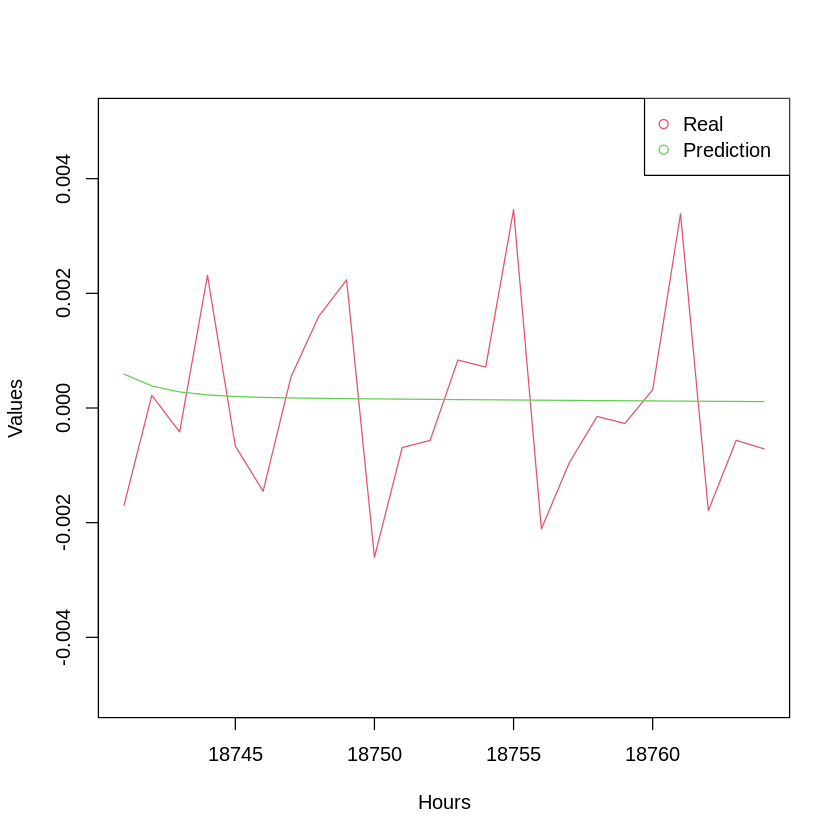

In [ ]:
plot(cdl_test,
     type = "l",
     col = 2,
     ylim = c(-0.005, 0.005),
     xlab = "Hours",
     ylab = "Values")
lines(cdl_prediction$pred,
      type = "l",
      col = 3)
legend("topright", legend = c("Real", "Prediction"), col=c(2, 3), pch=1)

## RMSE/MAE/AIC search

In [ ]:
arimas <- createArimas(cdl_learn, cdl_test, 5, 5, 5)
bestModels <- rbind(
  arimas[which.min(arimas$AIC),],
  arimas[which.min(arimas$RMSE),],
  arimas[which.min(arimas$MAE),]
)
bestModels

,p,d,q,RMSE,MAE,AIC
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
35,5,0,4,0.001552879,0.001324662,-192948.8
114,0,3,5,0.001473972,0.001243289,-185789.1
112,0,3,3,0.001511308,0.001172197,-183543.6


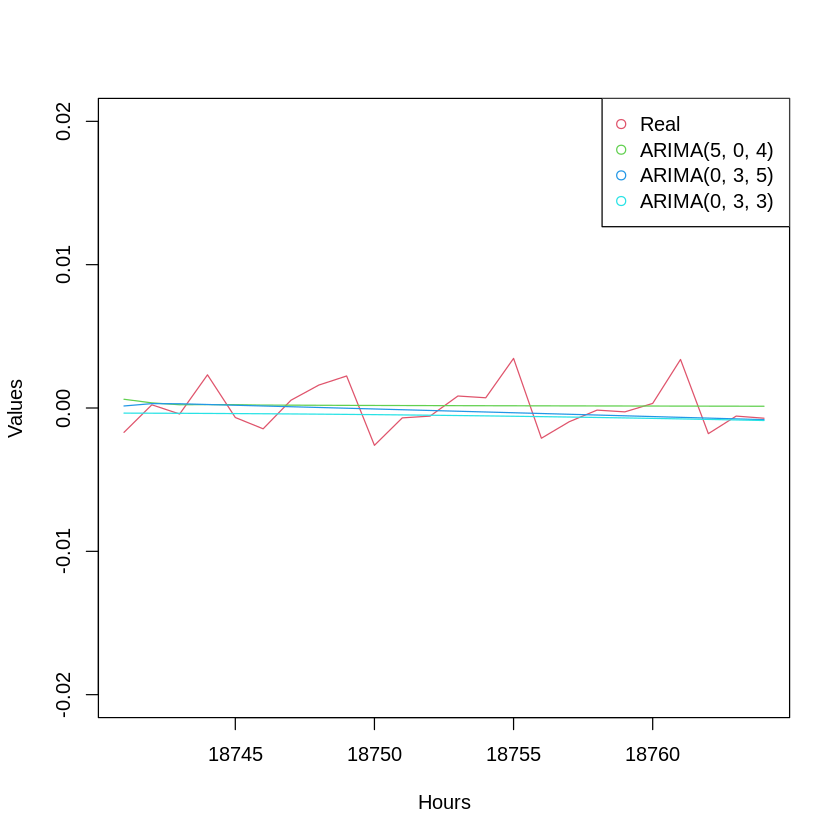

In [ ]:
arima114 <- predict(Arima(cdl_learn, order=c(5, 0, 4)), n.ahead = 24)
arima011 <- predict(Arima(cdl_learn, order=c(0, 3, 5)), n.ahead = 24)
arima515 <- predict(Arima(cdl_learn, order=c(0, 3, 3)), n.ahead = 24)
plot(cdl_test,
     type = "l",
     col = 2,
     ylim = c(-0.02, 0.02),
     xlab = "Hours",
     ylab = "Values")
lines(arima114$pred,
      type = "l",
      col = 3)
lines(arima011$pred,
      type = "l",
      col = 4)
lines(arima515$pred,
      type = "l",
      col = 5)
legend("topright", legend = c("Real", "ARIMA(5, 0, 4)", "ARIMA(0, 3, 5)", "ARIMA(0, 3, 3)"), col=c(2, 3, 4, 5), pch=1)

# [Nasa GISS Surface Temperature (GISTEMP) ](https://github.com/datasets/global-temp-anomalies)

In [ ]:
sh("wget https://raw.githubusercontent.com/datasets/global-temp-anomalies/master/data/global-temp-annual.csv -O gistemp.csv")

Очень интересный датасет, подойдет для многомерного исследования, хоть и так понятно что аномальная температура наверняка имеет зависимости с аномальной температурой в воде. В настоящее время будет проведено исследование на аномальные температуры на поверхности.

## Временной ряд

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


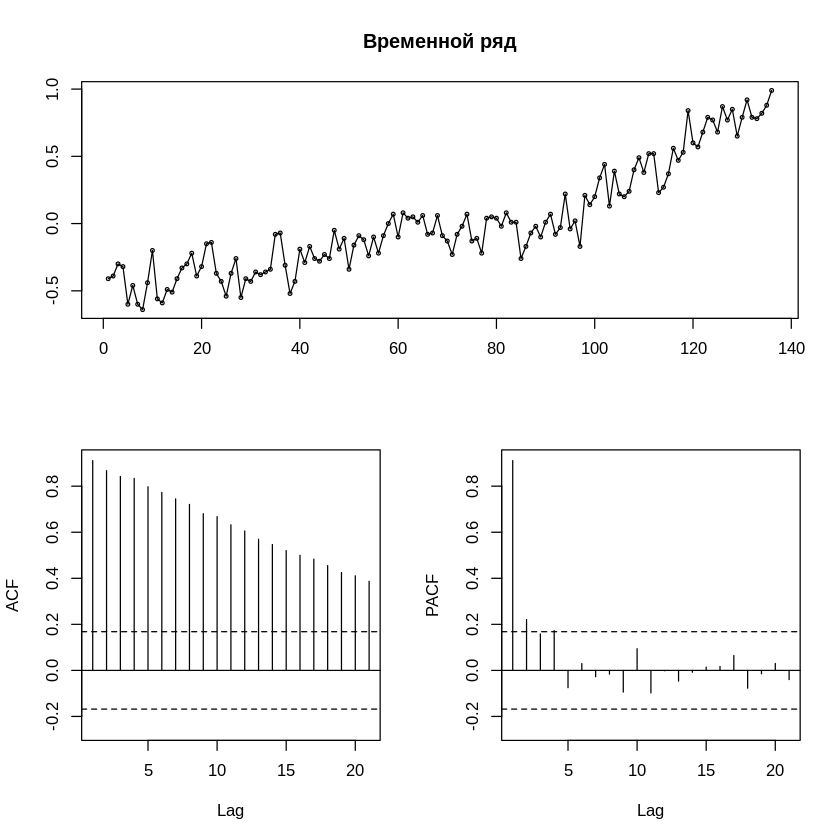

In [ ]:
gistemp <- ts(read.csv('gistemp.csv')$Land)
tsdisplay(gistemp, main = 'Временной ряд', ci.col = "black")

Явно виден тренд и сезонность, ряд не станционарен. Начнем подсчет с 1960 года

In [ ]:
gistemp <- window(gistemp, start = 80)

In [ ]:
gistemp_diff <- diff(gistemp)

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


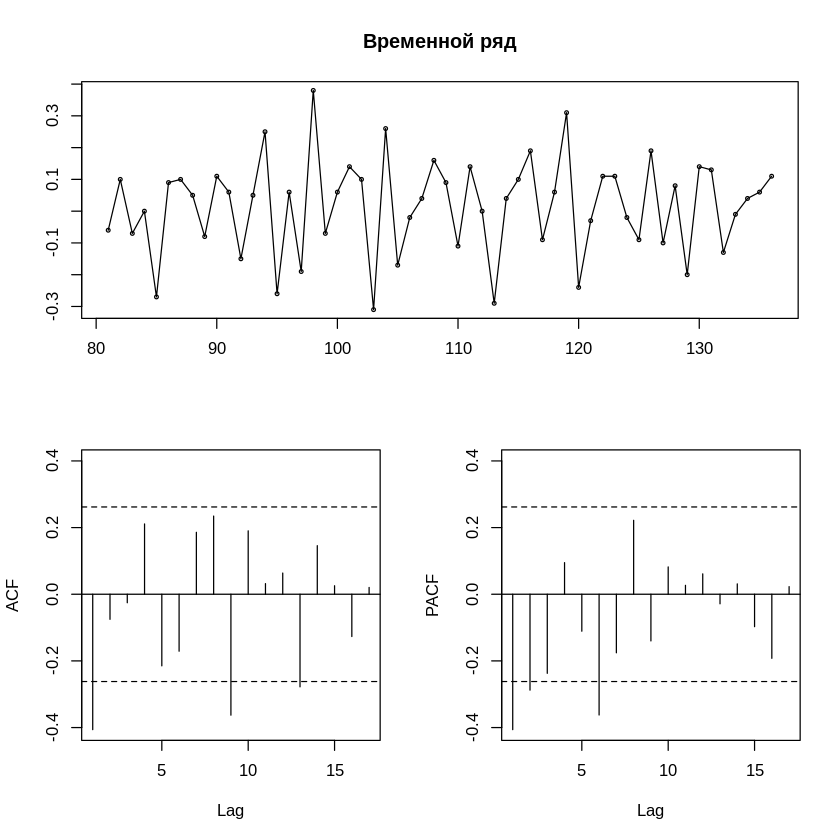

In [ ]:
tsdisplay(gistemp_diff, main = 'Временной ряд', ci.col = "black")

Явно наблюдается сезонность, ACF быстро стремится к нулю. ARMA(3, 3)?

In [ ]:
gistemp_test = tail(gistemp_diff, 12)
gistemp_learn = head(gistemp_diff, -12)

## Поиск лучшей модели ARIMA.auto

In [ ]:
autogistemp = auto.arima(gistemp_learn, trace= TRUE, ic ="aicc", approximation = FALSE, stepwise = FALSE, seasonal=TRUE)
summary(autogistemp)


 ARIMA(0,0,0) with zero mean     : -35.5855
 ARIMA(0,0,0) with non-zero mean : -33.87784
 ARIMA(0,0,1) with zero mean     : -43.3245
 ARIMA(0,0,1) with non-zero mean : -45.19563
 ARIMA(0,0,2) with zero mean     : -41.05935
 ARIMA(0,0,2) with non-zero mean : Inf
 ARIMA(0,0,3) with zero mean     : -38.71853
 ARIMA(0,0,3) with non-zero mean : Inf
 ARIMA(0,0,4) with zero mean     : -36.29316
 ARIMA(0,0,4) with non-zero mean : Inf
 ARIMA(0,0,5) with zero mean     : -34.97543
 ARIMA(0,0,5) with non-zero mean : Inf
 ARIMA(1,0,0) with zero mean     : -40.16393
 ARIMA(1,0,0) with non-zero mean : -39.04489
 ARIMA(1,0,1) with zero mean     : -41.05126
 ARIMA(1,0,1) with non-zero mean : Inf
 ARIMA(1,0,2) with zero mean     : -38.65447
 ARIMA(1,0,2) with non-zero mean : Inf
 ARIMA(1,0,3) with zero mean     : -36.16885
 ARIMA(1,0,3) with non-zero mean : Inf
 ARIMA(1,0,4) with zero mean     : -35.51765
 ARIMA(1,0,4) with non-zero mean : Inf
 ARIMA(2,0,0) with zero mean     : -40.58812
 ARIMA(2,0,0) 

Series: gistemp_learn 
ARIMA(0,0,1) with non-zero mean 

Coefficients:
          ma1    mean
      -0.7336  0.0178
s.e.   0.1702  0.0058

sigma^2 = 0.01857:  log likelihood = 25.9
AIC=-45.8   AICc=-45.2   BIC=-40.44

Training set error measures:
                       ME      RMSE       MAE MPE MAPE     MASE      ACF1
Training set -0.005256012 0.1331468 0.1072387 NaN  Inf 0.495835 0.1029069

In [ ]:
gistemp_prediction = predict(autogistemp, n.ahead = length(brent_test))
gistemp_prediction

$pred
Time Series:
Start = 125 
End = 136 
Frequency = 1 
 [1] -0.02175438  0.01781754  0.01781754  0.01781754  0.01781754  0.01781754
 [7]  0.01781754  0.01781754  0.01781754  0.01781754  0.01781754  0.01781754

$se
Time Series:
Start = 125 
End = 136 
Frequency = 1 
 [1] 0.1362801 0.1690154 0.1690154 0.1690154 0.1690154 0.1690154 0.1690154
 [8] 0.1690154 0.1690154 0.1690154 0.1690154 0.1690154

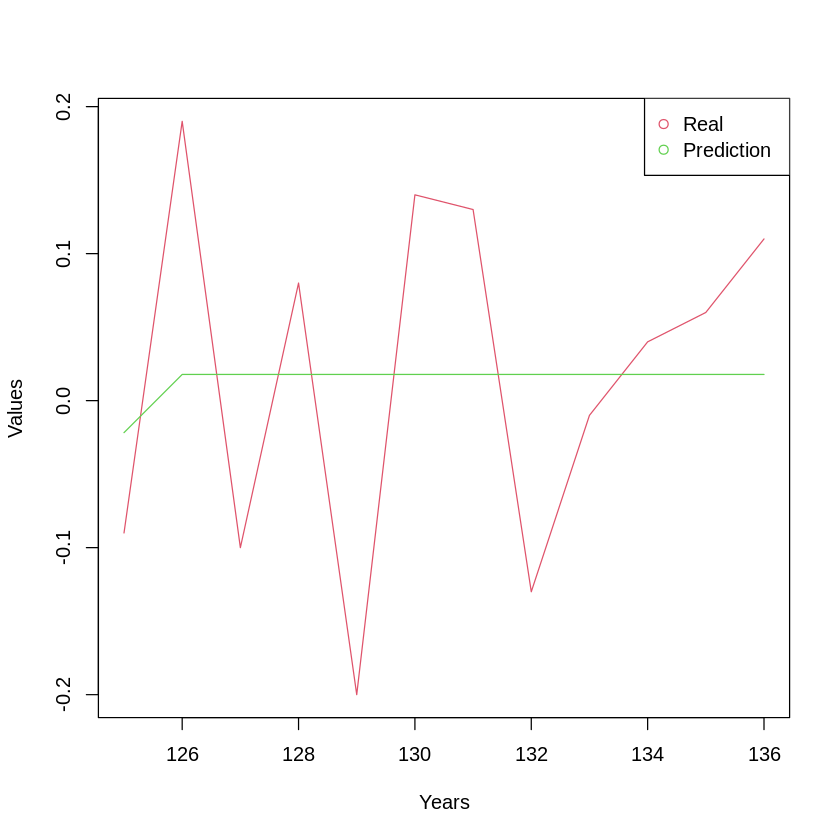

In [ ]:
plot(gistemp_test,
     type = "l",
     col = 2,
     xlab = "Years",
     ylab = "Values")
lines(gistemp_prediction$pred,
      type = "l",
      col = 3)
legend("topright", legend = c("Real", "Prediction"), col=c(2, 3), pch=1)

## RMSE/MAE/AIC search

In [ ]:
arimas <- createArimas(gistemp_learn, gistemp_test, 5, 5, 5)
bestModels <- rbind(
  arimas[which.min(arimas$AIC),],
  arimas[which.min(arimas$RMSE),],
  arimas[which.min(arimas$MAE),]
)
bestModels

,p,d,q,RMSE,MAE,AIC
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
18,2,0,5,0.1089666,0.09080422,-51.44153
36,5,0,5,0.1050408,0.08783155,-42.46295
361,5,0,5,0.1050408,0.08783155,-42.46295


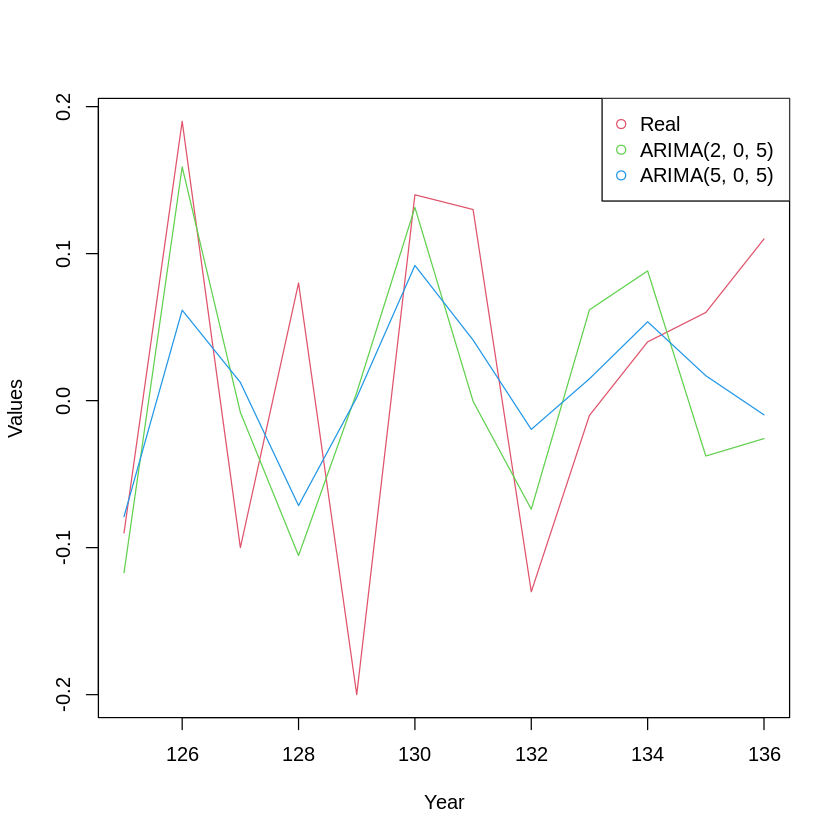

In [ ]:
arima1 <- predict(Arima(gistemp_learn, order=c(2, 0, 5)), n.ahead = 12)
arima2 <- predict(Arima(gistemp_learn, order=c(5, 0, 5)), n.ahead = 12)
plot(gistemp_test,
     type = "l",
     col = 2,
     #ylim = c(-20, 20),
     xlab = "Year",
     ylab = "Values")
lines(arima1$pred,
      type = "l",
      col = 3)
lines(arima2$pred,
      type = "l",
      col = 4)
legend("topright", legend = c("Real", "ARIMA(2, 0, 5)", "ARIMA(5, 0, 5)"), col=c(2, 3, 4), pch=1)

В целом $ARIMA(2, 0, 5)$ неплохо предсказывает аномальную температуру земли

Forecast for univariate time series: 
   Lead Forecast   S.E   Lower Upper
57    1  -0.1070 0.101 -0.3050 0.091
58    2   0.2018 0.126 -0.0446 0.448
59    3  -0.0328 0.130 -0.2866 0.221
60    4  -0.0773 0.134 -0.3406 0.186
61    5  -0.0309 0.134 -0.2943 0.233
62    6   0.1123 0.140 -0.1628 0.387
63    7   0.0458 0.140 -0.2294 0.321
64    8  -0.0658 0.145 -0.3491 0.218
65    9   0.0123 0.145 -0.2717 0.296
66   10   0.0944 0.148 -0.1947 0.384
67   11   0.0117 0.148 -0.2787 0.302
68   12  -0.0440 0.150 -0.3375 0.249
------ 
Note: confidence level = 95 % 


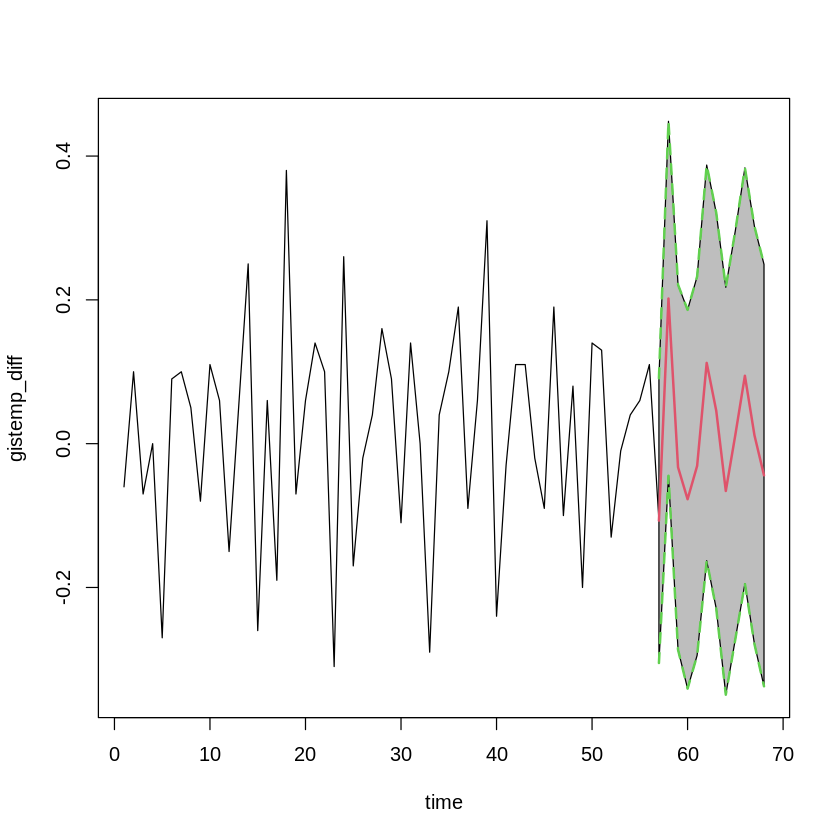

In [ ]:
forecast(arima(gistemp_diff, order=c(2, 0, 5)), 12)

# [LASP spacecraft telemetry anomalies](https://github.com/sapols/Satellite-Telemetry-Anomaly-Detection), battery

Тоже интересный датасет с данными датчиков со спутника - батарея, шина, количество оборотов и температура Reaction wheel, 

In [ ]:
sh("wget https://raw.githubusercontent.com/sapols/Satellite-Telemetry-Anomaly-Detection/master/Data/BatteryTemperature.csv -O lasp_battery.csv")

## Временной ряд

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


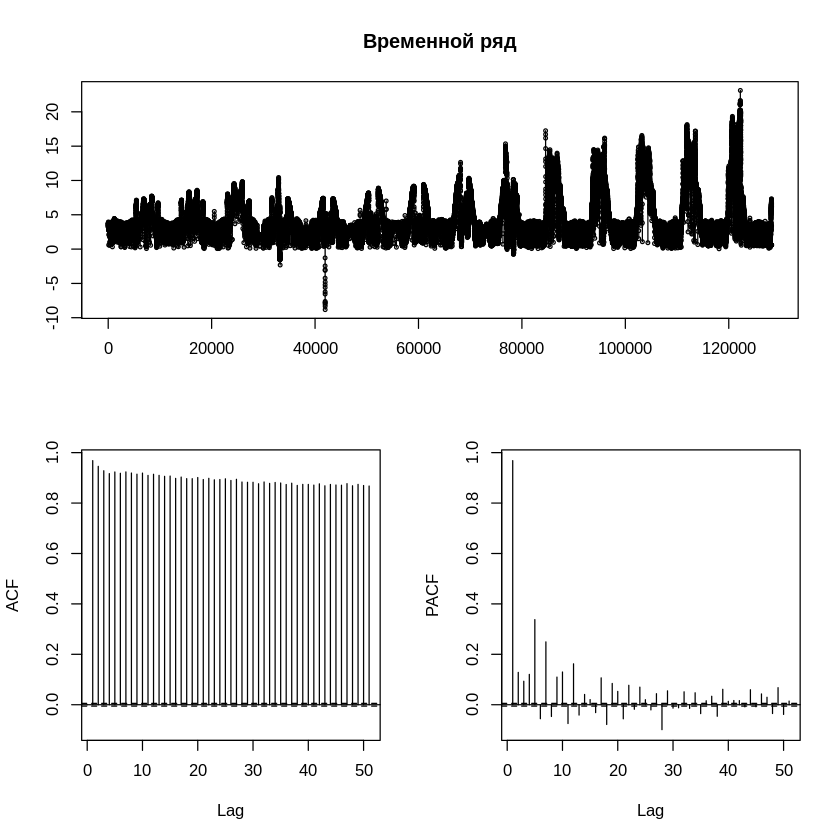

In [ ]:
battery <- ts(read.csv('lasp_battery.csv')[2])
tsdisplay(battery, main = 'Временной ряд', ci.col = "black")

Видна некоторая сезонность, а также выбросы и пропущенные значения

In [ ]:
battery <- tsclean(battery, iterate = 12, lambda = "auto")

Warning message in guerrero(x, lower, upper):
“Guerrero's method for selecting a Box-Cox parameter (lambda) is given for strictly positive data.”


Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


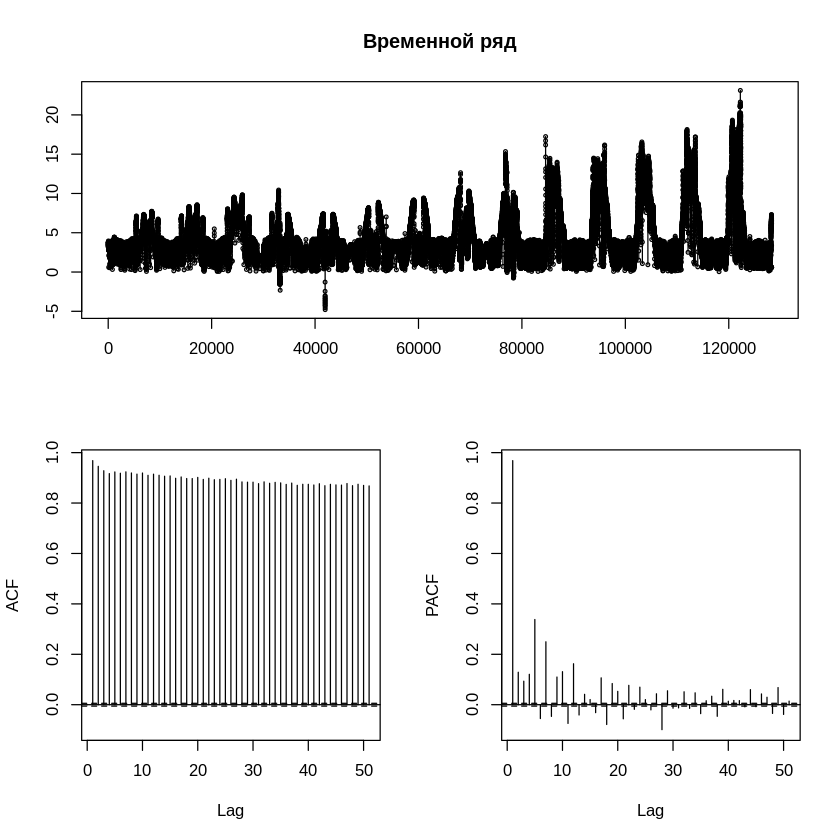

In [ ]:
tsdisplay(battery, main = 'Временной ряд', ci.col = "black")

In [ ]:
battery <- mapply(\(x) if(x >= 1) x else 1, battery)
battery <- mapply(\(x) if(x <= 18) x else 18, battery)

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


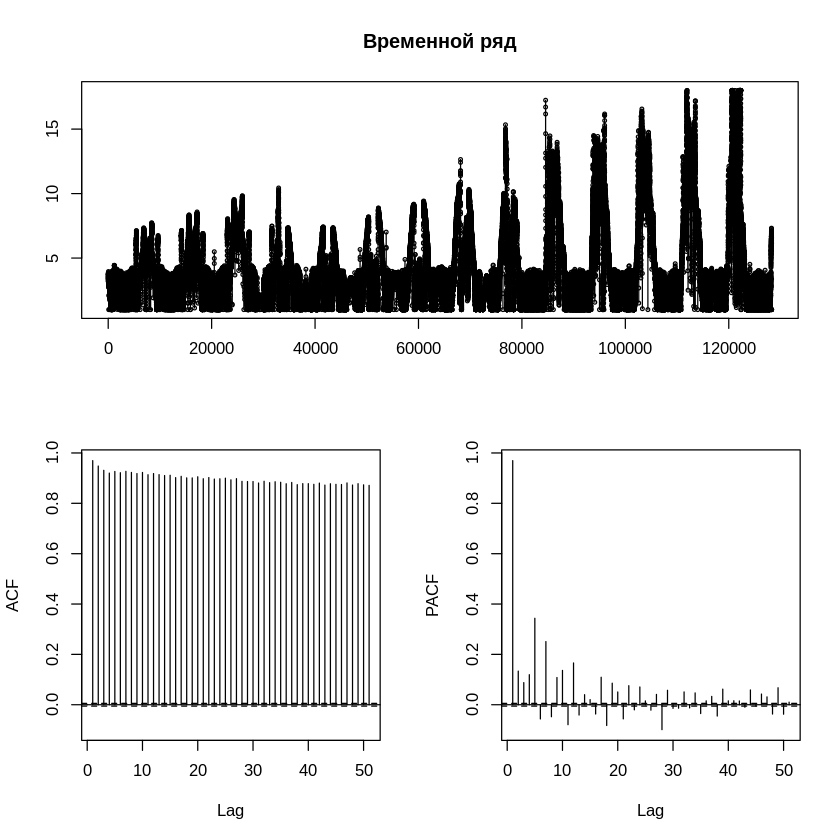

In [ ]:
tsdisplay(battery, main = 'Временной ряд', ci.col = "black")

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


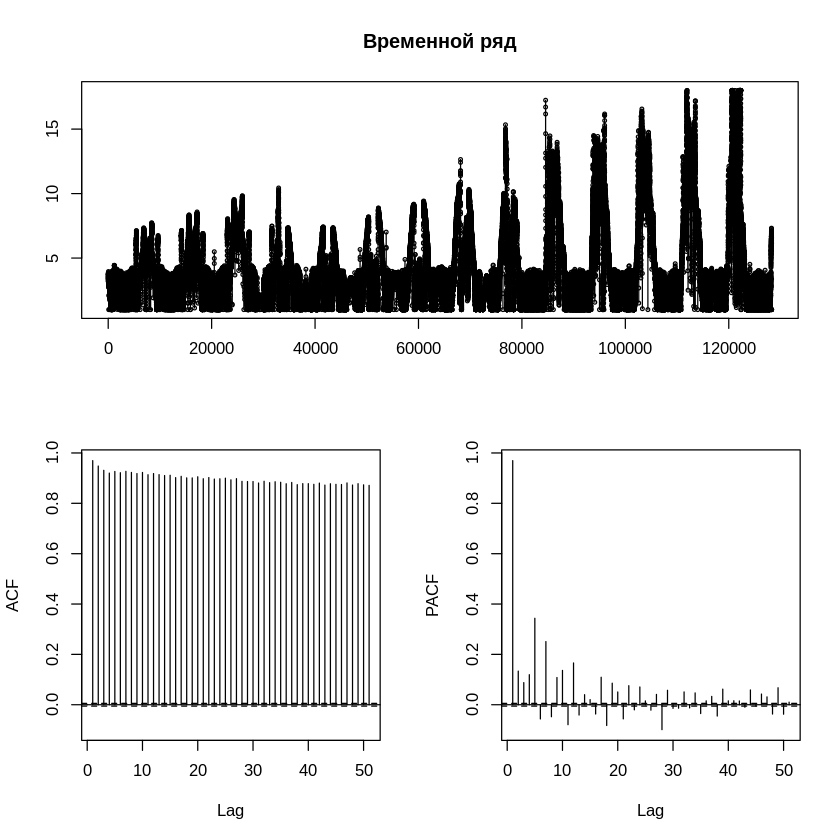

In [ ]:
battery <- tsclean(battery, iterate = 12, lambda = "auto")
tsdisplay(battery, main = 'Временной ряд', ci.col = "black")

Warning message in plot.window(xlim, ylim, log, ...):
“"ci.col" is not a graphical parameter”
Warning message in title(main = main, xlab = xlab, ylab = ylab, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(1, ...):
“"ci.col" is not a graphical parameter”
Warning message in axis(2, ...):
“"ci.col" is not a graphical parameter”
Warning message in box(...):
“"ci.col" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"ci.col" is not a graphical parameter”


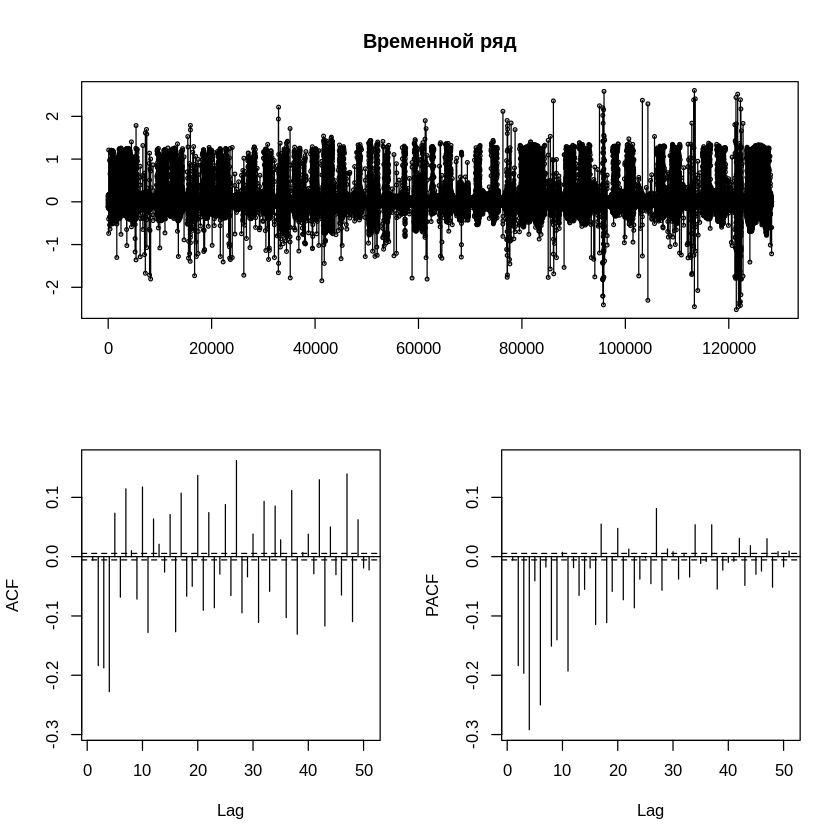

In [ ]:
tsdisplay(diff(log(battery)), main = 'Временной ряд', ci.col = "black")

In [ ]:
battery_difflog <- diff(log(battery))

In [ ]:
adf.test(battery_difflog)

Warning message in adf.test(battery_difflog):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  battery_difflog
Dickey-Fuller = -66.437, Lag order = 50, p-value = 0.01
alternative hypothesis: stationary


p < 0.05

In [ ]:
battery_test = tail(battery_difflog, 12)
battery_learn = head(battery_difflog, -12)

## Arima.auto

In [ ]:
autobattery = auto.arima(battery_learn, trace= TRUE, ic ="aicc", approximation = FALSE, stepwise = FALSE, seasonal=TRUE)
summary(autobattery)


 ARIMA(0,0,0) with zero mean     : 21139.94
 ARIMA(0,0,0) with non-zero mean : 21141.94
 ARIMA(0,0,1) with zero mean     : 21134.72
 ARIMA(0,0,1) with non-zero mean : 21136.72
 ARIMA(0,0,2) with zero mean     : -1800.502
 ARIMA(0,0,2) with non-zero mean : -1798.505
 ARIMA(0,0,3) with zero mean     : -6936.62
 ARIMA(0,0,3) with non-zero mean : -6934.625
 ARIMA(0,0,4) with zero mean     : -11612.65
 ARIMA(0,0,4) with non-zero mean : -11610.66
 ARIMA(0,0,5) with zero mean     : -13857.92
 ARIMA(0,0,5) with non-zero mean : -13855.93
 ARIMA(1,0,0) with zero mean     : 21137.4
 ARIMA(1,0,0) with non-zero mean : 21139.4
 ARIMA(1,0,1) with zero mean     : -1968.262
 ARIMA(1,0,1) with non-zero mean : -1966.27
 ARIMA(1,0,2) with zero mean     : -7806.721
 ARIMA(1,0,2) with non-zero mean : -7804.727
 ARIMA(1,0,3) with zero mean     : -8426.071
 ARIMA(1,0,3) with non-zero mean : -8424.084
 ARIMA(1,0,4) with zero mean     : -13514.4
 ARIMA(1,0,4) with non-zero mean : -13512.41
 ARIMA(2,0,0) with z

Series: battery_learn 
ARIMA(0,0,5) with zero mean 

Coefficients:
          ma1      ma2      ma3      ma4     ma5
      -0.2078  -0.3893  -0.2211  -0.1971  0.1297
s.e.   0.0028   0.0029   0.0030   0.0028  0.0027

sigma^2 = 0.05255:  log likelihood = 6934.96
AIC=-13857.93   AICc=-13857.92   BIC=-13799.35

Training set error measures:
                       ME      RMSE       MAE MPE MAPE      MASE        ACF1
Training set 4.287158e-05 0.2292349 0.1409443 NaN  Inf 0.6618877 0.002851821

In [ ]:
battery_prediction = predict(autobattery, n.ahead = length(battery_test))
battery_prediction

$pred
Time Series:
Start = 128276 
End = 128287 
Frequency = 1 
 [1] -0.010750513  0.022097946 -0.011565992  0.009348448 -0.003031950
 [6]  0.000000000  0.000000000  0.000000000  0.000000000  0.000000000
[11]  0.000000000  0.000000000

$se
Time Series:
Start = 128276 
End = 128287 
Frequency = 1 
 [1] 0.2292394 0.2341372 0.2505698 0.2556430 0.2596043 0.2613003 0.2613003
 [8] 0.2613003 0.2613003 0.2613003 0.2613003 0.2613003

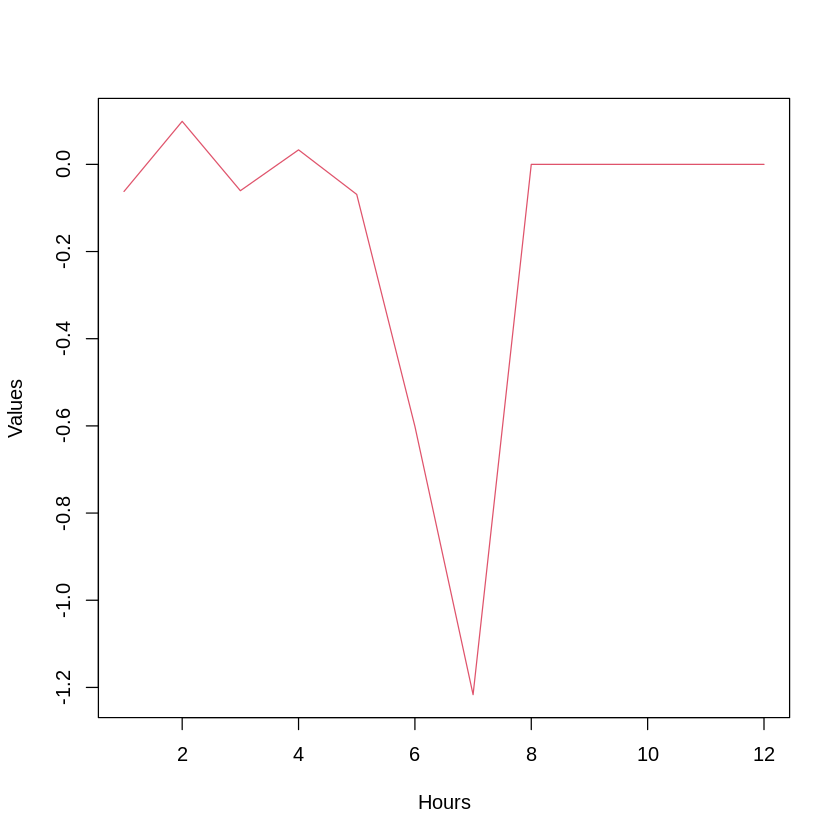

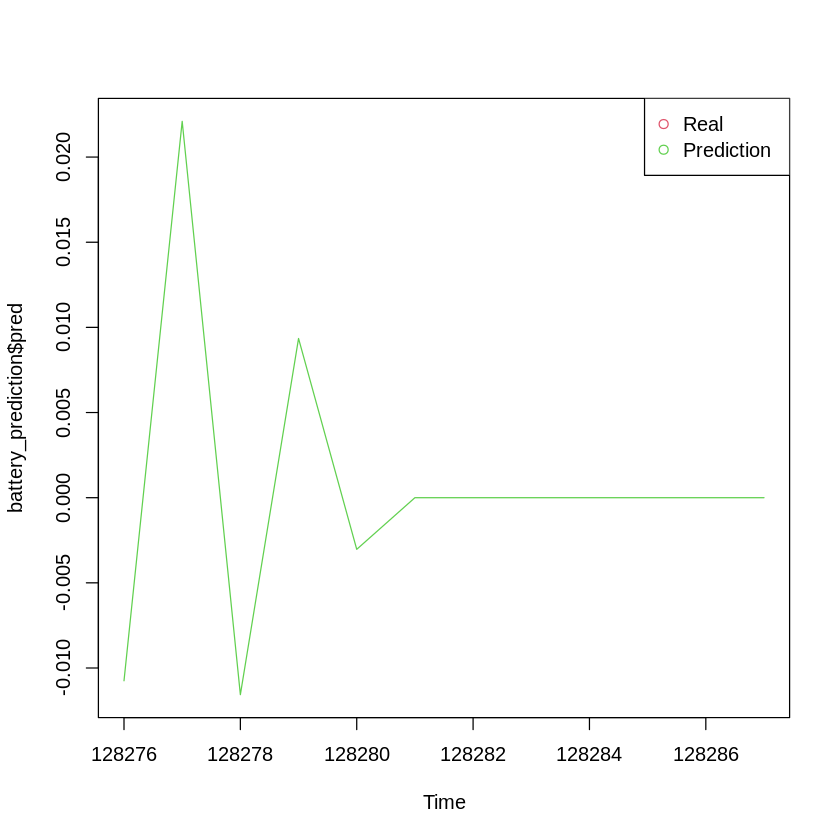

In [ ]:
plot(battery_test,
     type = "l",
     col = 2,
     xlab = "Hours",
     ylab = "Values")
plot(battery_prediction$pred,
      type = "l",
      col = 3)
legend("topright", legend = c("Real", "Prediction"), col=c(2, 3), pch=1)

## RMSE/MAE/AIC search

In [ ]:
arimas <- createArimas(battery_learn, battery_test, 5, 5, 5)
bestModels <- rbind(
  arimas[which.min(arimas$AIC),],
  arimas[which.min(arimas$RMSE),],
  arimas[which.min(arimas$MAE),]
)
bestModels

,p,d,q,RMSE,MAE,AIC
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
30,4,0,5,0.3944225,0.1802629,-29680.29
81,2,2,0,0.3719428,0.2052530,148862.05
116,2,3,4,0.3937928,0.1715613,90673.22


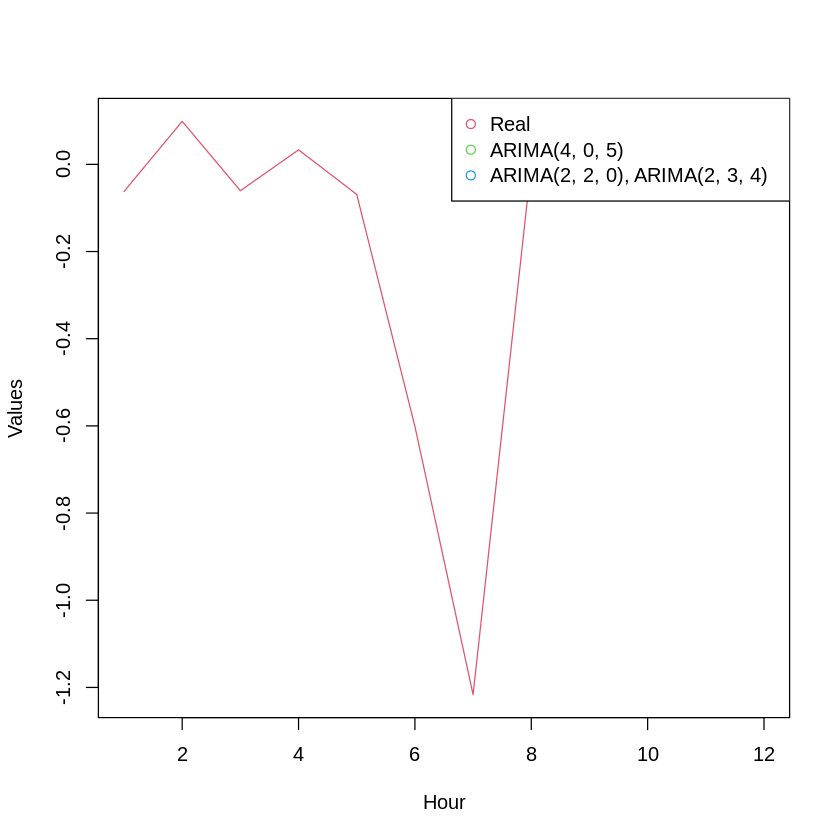

In [ ]:
arima1 <- predict(Arima(battery_learn, order=c(4, 0, 5)), n.ahead = 12)
arima2 <- predict(Arima(battery_learn, order=c(2, 2, 0)), n.ahead = 12)
arima3 <- predict(Arima(battery_learn, order=c(2, 3, 4)), n.ahead = 12)
plot(battery_test,
     type = "l",
     col = 2,
     #ylim = c(-20, 20),
     xlab = "Hour",
     ylab = "Values")
lines(arima1$pred,
      type = "l",
      col = 3)
lines(arima2$pred,
      type = "l",
      col = 4)
lines(arima3$pred,
      type = "l",
      col = 5)
legend("topright", legend = c("Real", "ARIMA(4, 0, 5)", "ARIMA(2, 2, 0), ARIMA(2, 3, 4)"), col=c(2, 3, 4, 5), pch=1)

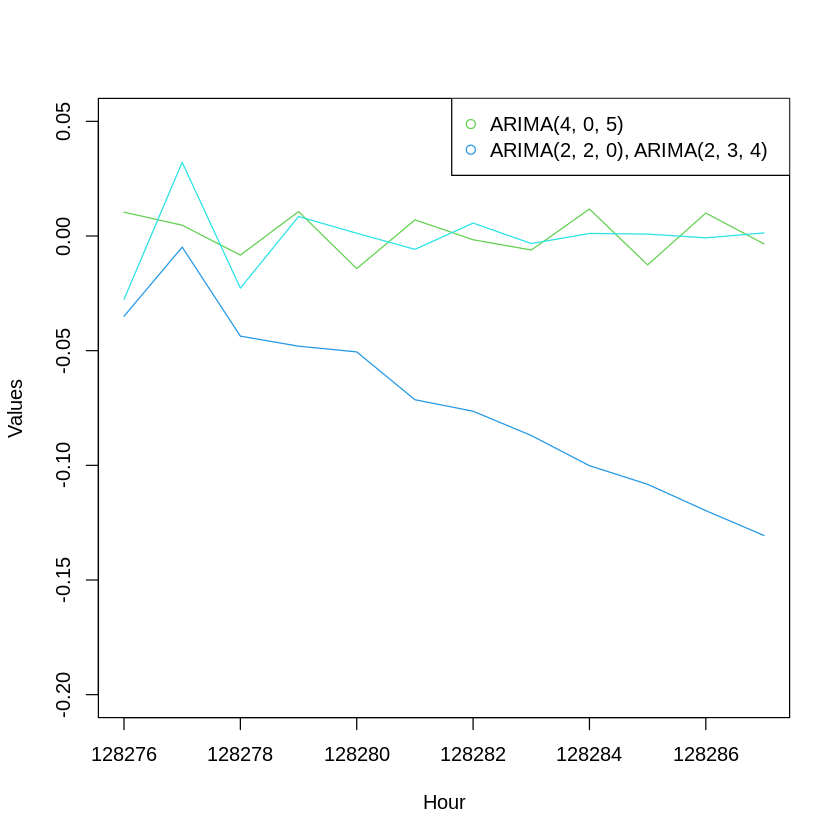

In [ ]:
plot(arima1$pred,
      type = "l",
      col = 3,
      ylim = c(-0.2, 0.05),
      xlab = "Hour",
      ylab = "Values")
lines(arima2$pred,
      type = "l",
      col = 4)
lines(arima3$pred,
      type = "l",
      col = 5)
legend("topright", legend = c("ARIMA(4, 0, 5)", "ARIMA(2, 2, 0), ARIMA(2, 3, 4)"), col=c(3, 4, 5), pch=1)